# Download da base de dados

https://docs.google.com/spreadsheets/d/1c4gpm8MKSG6NXZgSZzDmI2AmMaLPxOR5/edit?usp=drive_link&ouid=108751598473419779391&rtpof=true&sd=true

# Importar as bibliotecas necessárias

In [160]:
#------------------------------------------#
# CRIAR DIRETÓRIOS PARA DADOS E RESULTADOS #
#------------------------------------------#
from pathlib import Path
from os import listdir

#--------------------------------------#
# LISTAR E MANIPULAR ARQUIVOS DE DADOS #
#--------------------------------------#
import pandas as pd
import os.path
from os.path import isfile, join
import random
import numpy as np


#---------------------------------------------------#
# ANÁLISE DE DADOS - ALGORITMOS DE MACHINE LEARNING #
#---------------------------------------------------#

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn import metrics, preprocessing
from sklearn.metrics import confusion_matrix, mean_absolute_error, mean_squared_error, accuracy_score
import statsmodels.api as sm
import scipy.stats as stats
import math

# Regressão Linear
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LogisticRegression
from sklearn.datasets import make_regression

# Árvore de Decisão
from sklearn.tree import DecisionTreeRegressor

# Floresta Aleatória
from sklearn.ensemble import RandomForestRegressor

#-----------------------#
# VISUALIZAÇÃO DE DADOS #
#-----------------------#
import seaborn as sns
import matplotlib.pyplot as plt

#-------------------#
# INTERFACE GRÁFICA #
#-------------------#
#from PySimpleGUI import PySimpleGUI as sg

#--------------------#
# IGNORANDO WARNINGS #
#--------------------#
# Durante o desenvolvimento do notebooks foram exibidos warnings a respeito
# de bibliotecas que serão alteradas futuramente (pandas)
import warnings
warnings.filterwarnings('ignore')

# Preparando dataframe

In [161]:
#----------------------------#
# SELECIONANDO ARQUIVO DE DADOS #
#----------------------------#

#----------------------------------------------------------------#
# Varrendo diretório onde está localizado o arquivo de dados #
#----------------------------------------------------------------#

# Definindo nome do diretório
path = r"C:\TCC\00_tcc_dadoscoletados.xlsx"
path

df = pd.read_excel(path, engine='openpyxl')
df


,CANAL,GRUPO,FLAG_MAIORES_IMPACTOS,SALDO_PDD_POTENCIAL,SALDO_ESTOQUE_PDD,NM_CLIENTE,SALDO,DT_PAGTO,DT_EXCLUSAO,TIPO_PAGTO,NR_CONTRATO,BASE,NR_DIAS_ATRASO
0,LEVES,ADM,NÃO,1905.3300,211.7000,DEIVISON DE SOUZA PINTO,21170.29,2013-12-02,NaT,A,7853468,SISABASE,56
1,LEVES,ADM,NÃO,178.5400,76.5100,ALDAIR BRANDAO CORREA,2550.47,2013-12-02,NaT,P,9721655,SISABASE,46
2,LEVES,ADM,NÃO,1489.7500,638.4700,JESSICA PAOLLA SILVA MARINHO,21282.18,2013-12-02,NaT,P,10834000,SISABASE,51
3,LEVES,ADM,NÃO,5043.7500,560.4200,AUGUSTO FERREIRA COSTA,18680.55,2013-12-02,NaT,P,15361348,SISABASE,68
4,FIAT/CONCESSIONARIAS,ADM,NÃO,2451.9700,1225.9800,ROSA MARIA ALVES P DE AGUIAR,12259.83,2013-12-02,NaT,A,20061412,SISABASE,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10267,LEVES,ADM,Não,1882.7137,806.8773,VANESSA RIBEIRO VALENTE,26895.91,NaT,NaT,NaN,17021957,SISAENTR,47
10268,FIAT/CONCESSIONARIAS,ADM,Não,2142.1036,918.0444,JUCIARA MOURA S SANTOS LEAL,30601.48,NaT,NaT,NaN,21314612,SISAENTR,47
10269,FIAT/CONCESSIONARIAS,ADM,Não,786.7538,393.3769,ROGERIO PEREIRA DE SOUZA,39337.69,NaT,NaT,NaN,23494354,SISAENTR,16
10270,FIAT/CONCESSIONARIAS,Especialista Reneg FIAT/CONCESSIONARIAS,Não,786.7538,393.3769,MARCOS ANTONIO MARTINS SOARES,33129.33,NaT,NaT,NaN,25589326,SISAENTR,-9


## Rótulos dos dados coletados

| Atributo | Descrição |
|:---|:---|
|CANAL|Grupo a que pertence o contrato a depender do atraso|
|GRUPO|Grupo a que pertence o contrato|
|FLAG_MAIORES_IMPACTOS|Impacto a depender do valor e atraso|
|SALDO_PDD_POTENCIAL|Última parcela devedora|
|SALDO_ESTOQUE_PDD|Saldo recuperado|
|NM_CLIENTE|Nome do cliente|
|REGIAO|Região do contrato|
|SALDO|Saldo total devedor do contrato|
|DT_PAGTO|Data do vencimento da parcela|
|DT_EXCLUSAO|Data da exclusão da parcela do sistema|
|NR_CONTRATO|Número do contrato|
|BASE|Base de extração do contrato|
|NR_DIAS_ATRASO|Total dos dias de atraso|

In [162]:
#-----------------------------------------------------#
# IMPORTANDO REGISTROS DO ARQUIVO DE DADOS LISTADOS #
#-----------------------------------------------------#

# Verificar informações de total de registros e colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10272 entries, 0 to 10271
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   CANAL                  10272 non-null  object        
 1   GRUPO                  10272 non-null  object        
 2   FLAG_MAIORES_IMPACTOS  10272 non-null  object        
 3   SALDO_PDD_POTENCIAL    10272 non-null  float64       
 4   SALDO_ESTOQUE_PDD      10272 non-null  float64       
 5   NM_CLIENTE             10272 non-null  object        
 6   SALDO                  10272 non-null  float64       
 7   DT_PAGTO               5305 non-null   datetime64[ns]
 8   DT_EXCLUSAO            1699 non-null   datetime64[ns]
 9   TIPO_PAGTO             5342 non-null   object        
 10  NR_CONTRATO            10272 non-null  int64         
 11  BASE                   10272 non-null  object        
 12  NR_DIAS_ATRASO         10272 non-null  int64         
dtypes

In [163]:
#-----------------------------------------------------#
# REMOVENDO COLUNAS QUE NÃO SERÃO UTILIZADAS: #
#  CANAL, GRUPO, FLAG_MAIORES_IMPACTOS, NM_CLIENTE #
#  DT_PAGTO, DT_EXCLUSAO, TIPO_PAGTO #
#-----------------------------------------------------#


df_sem_colunas_selecionadas = df.drop(["CANAL", "GRUPO", "FLAG_MAIORES_IMPACTOS",
                        "NM_CLIENTE", "DT_PAGTO", "DT_EXCLUSAO", "TIPO_PAGTO"], axis = 1)
df_sem_colunas_selecionadas

,SALDO_PDD_POTENCIAL,SALDO_ESTOQUE_PDD,SALDO,NR_CONTRATO,BASE,NR_DIAS_ATRASO
0,1905.3300,211.7000,21170.29,7853468,SISABASE,56
1,178.5400,76.5100,2550.47,9721655,SISABASE,46
2,1489.7500,638.4700,21282.18,10834000,SISABASE,51
3,5043.7500,560.4200,18680.55,15361348,SISABASE,68
4,2451.9700,1225.9800,12259.83,20061412,SISABASE,71
...,...,...,...,...,...,...
10267,1882.7137,806.8773,26895.91,17021957,SISAENTR,47
10268,2142.1036,918.0444,30601.48,21314612,SISAENTR,47
10269,786.7538,393.3769,39337.69,23494354,SISAENTR,16
10270,786.7538,393.3769,33129.33,25589326,SISAENTR,-9


In [164]:
#-----------------------------------------------------#
# ORDENAÇÃO DA POSIÇÃO DAS COLUNAS: #
#-----------------------------------------------------#

df_colunas_posicionadas = df_sem_colunas_selecionadas[["NR_CONTRATO", "BASE", "SALDO_PDD_POTENCIAL", 
                                                       "SALDO_ESTOQUE_PDD", "SALDO", "NR_DIAS_ATRASO"]]
df_colunas_posicionadas

,NR_CONTRATO,BASE,SALDO_PDD_POTENCIAL,SALDO_ESTOQUE_PDD,SALDO,NR_DIAS_ATRASO
0,7853468,SISABASE,1905.3300,211.7000,21170.29,56
1,9721655,SISABASE,178.5400,76.5100,2550.47,46
2,10834000,SISABASE,1489.7500,638.4700,21282.18,51
3,15361348,SISABASE,5043.7500,560.4200,18680.55,68
4,20061412,SISABASE,2451.9700,1225.9800,12259.83,71
...,...,...,...,...,...,...
10267,17021957,SISAENTR,1882.7137,806.8773,26895.91,47
10268,21314612,SISAENTR,2142.1036,918.0444,30601.48,47
10269,23494354,SISAENTR,786.7538,393.3769,39337.69,16
10270,25589326,SISAENTR,786.7538,393.3769,33129.33,-9


In [165]:
#-----------------------------------------------------#
# REMOÇÃO DE VALORES NEGATIVOS OU ZERADOS: #
#-----------------------------------------------------#

# SÃO REMOVIDOS OS SALDOS COM VALORES MENORES DO QUE 1, POIS O BANCO NÃO FICA DEVENDO VALORES PARA OS CONTRATOS
df_saldo_positivo = df_colunas_posicionadas.loc[df_colunas_posicionadas['SALDO'] > 0]

# SÃO REMOVIDOS OS SALDO_PDD_POTENCIAL MENORES DO QUE 1, QUE SÃO AS PARCELAS, POIS SOMENTE PARCELAS EXISTENTES SÃO COBRADAS
df_saldo_pdd_potencial_posit = df_saldo_positivo.loc[df_saldo_positivo['SALDO_PDD_POTENCIAL'] > 0]

# SÃO REMOVIDOS OS DIAS EM ATRASO MENORES DO QUE 1, POIS SÃO COBRADOS SOMENTE CONTRATOS ATRASADOS
df_colunas_numeros_dias_atraso = df_saldo_pdd_potencial_posit.loc[df_saldo_pdd_potencial_posit['NR_DIAS_ATRASO'] > 0]
df_colunas_numeros_dias_atraso.count()


NR_CONTRATO            8925
BASE                   8925
SALDO_PDD_POTENCIAL    8925
SALDO_ESTOQUE_PDD      8925
SALDO                  8925
NR_DIAS_ATRASO         8925
dtype: int64

In [166]:
# Contando registros duplicados na 'NR_CONTRATO'
registros_duplicados_contratos = df_colunas_numeros_dias_atraso['NR_CONTRATO'].duplicated().sum()
registros_duplicados_contratos

157

In [167]:
# Ordenação pela coluna BASE de forma ascendente
df_ordenado = df_colunas_numeros_dias_atraso.sort_values(by='BASE', ascending=False)
df_ordenado

,NR_CONTRATO,BASE,SALDO_PDD_POTENCIAL,SALDO_ESTOQUE_PDD,SALDO,NR_DIAS_ATRASO
10271,34645945,SISAENTR,23.76400,23.76400,4752.80,14
2182,40220899,SISAENTR,156.82720,78.41360,7841.36,29
4547,37395639,SISAENTR,11.38560,11.38560,2277.12,12
4546,605587302,SISAENTR,11.53065,11.53065,2306.13,14
4545,598536274,SISAENTR,50.46480,50.46480,10092.96,14
...,...,...,...,...,...,...
3111,94145836,SISABASE,4930.82000,2465.41000,24654.10,75
3110,89610943,SISABASE,1770.15000,758.64000,25287.94,46
3109,84003185,SISABASE,417.61000,208.81000,20880.63,43
3108,48772875,SISABASE,388.83000,166.64000,5554.66,33


In [168]:
# Exemplo de registros duplicados

contrato_selecionado = df_ordenado.query('NR_CONTRATO == 5901376')
contrato_selecionado

,NR_CONTRATO,BASE,SALDO_PDD_POTENCIAL,SALDO_ESTOQUE_PDD,SALDO,NR_DIAS_ATRASO
9881,5901376,SISAENTR,48.1998,48.1998,9639.96,7
1710,5901376,SISABASE,704.4700,301.9200,10063.90,37


In [169]:
# Identificação dos itens duplicados, soma das colunas SALDO_PDD_POTENCIAL, SALDO_ESTOQUE_PDD
# e NR_DIAS_ATRASO, mantendo o SALDO da base SISAENTR
df_somado = df_ordenado.groupby('NR_CONTRATO').agg({'BASE': 'first', 
                                                    'SALDO_PDD_POTENCIAL': 'sum', 
                                                    'SALDO_ESTOQUE_PDD': 'sum', 
                                                    'SALDO': 'first', 
                                                    'NR_DIAS_ATRASO': 'sum'}).reset_index()
df_somado

,NR_CONTRATO,BASE,SALDO_PDD_POTENCIAL,SALDO_ESTOQUE_PDD,SALDO,NR_DIAS_ATRASO
0,239202,SISAENTR,37.33680,37.33680,7467.36,11
1,1882463,SISABASE,222.35000,95.29000,3176.36,43
2,1948793,SISAENTR,8.69795,8.69795,1739.59,3
3,4678066,SISABASE,690.24000,295.82000,9860.57,33
4,5020136,SISABASE,1557.66000,667.57000,22252.28,48
...,...,...,...,...,...,...
8763,810898320,SISABASE,472.63000,236.32000,23631.61,22
8764,810909127,SISABASE,540.44000,231.61000,7720.47,49
8765,810913509,SISABASE,4820.24000,2410.12000,24101.20,150
8766,811104140,SISABASE,439.76000,188.47000,6282.34,37


In [170]:
# Exemplo do funcionamento de remoção de contrato duplicado 
# e soma dos valores, com exceção do SALDO que permaneceu
# o valor de acordo com a coluna BASE SISAENTR

filtro = df_somado.query('NR_CONTRATO == 5901376')
filtro

,NR_CONTRATO,BASE,SALDO_PDD_POTENCIAL,SALDO_ESTOQUE_PDD,SALDO,NR_DIAS_ATRASO
13,5901376,SISAENTR,752.6698,350.1198,9639.96,44


In [171]:
df_somado['SALDO_PDD_POTENCIAL'].describe().round()

count     8768.0
mean      1587.0
std       2420.0
min          2.0
25%        279.0
50%        769.0
75%       1962.0
max      46121.0
Name: SALDO_PDD_POTENCIAL, dtype: float64

# Análise exploratória

In [172]:
# Criação das colunas GRUPO e PARCELAS
# GRUPO agrupa os contratos pelos dias de atraso (até 30, 60, 90, 180 e 365)
# PARCELAS faz a divisão entre o SALDO devedor e parcela SALDO_PDD_POTENCIAL 
# para estimar o número de parcelas restantes

df = df_somado
atraso = df['NR_DIAS_ATRASO']
df['GRUPO'] = np.where(atraso <= 30, 30, np.where((atraso > 30) 
                & (atraso <= 60), 60, np.where((atraso > 60) 
                & (atraso <= 90), 90, np.where((atraso > 90) 
                & (atraso <= 180), 180, 365))))

df['PARCELAS'] = (df['SALDO'] / df['SALDO_PDD_POTENCIAL']).round().astype(int)

df

,NR_CONTRATO,BASE,SALDO_PDD_POTENCIAL,SALDO_ESTOQUE_PDD,SALDO,NR_DIAS_ATRASO,GRUPO,PARCELAS
0,239202,SISAENTR,37.33680,37.33680,7467.36,11,30,200
1,1882463,SISABASE,222.35000,95.29000,3176.36,43,60,14
2,1948793,SISAENTR,8.69795,8.69795,1739.59,3,30,200
3,4678066,SISABASE,690.24000,295.82000,9860.57,33,60,14
4,5020136,SISABASE,1557.66000,667.57000,22252.28,48,60,14
...,...,...,...,...,...,...,...,...
8763,810898320,SISABASE,472.63000,236.32000,23631.61,22,30,50
8764,810909127,SISABASE,540.44000,231.61000,7720.47,49,60,14
8765,810913509,SISABASE,4820.24000,2410.12000,24101.20,150,180,5
8766,811104140,SISABASE,439.76000,188.47000,6282.34,37,60,14


In [173]:
# Renomeação de colunas

df = df.rename(columns={'NR_CONTRATO': 'Contrato', 'NR_DIAS_ATRASO': 'Atraso', 'SALDO_ESTOQUE_PDD': 'Saldo_Recuperado'})
df = df.rename(columns={'SALDO_PDD_POTENCIAL': 'Saldo_Potencial', 'SALDO': 'Saldo', 'BASE': 'Base'})
df = df.rename(columns={'GRUPO': 'Grupo', 'PARCELAS': 'Parcelas'})
df


,Contrato,Base,Saldo_Potencial,Saldo_Recuperado,Saldo,Atraso,Grupo,Parcelas
0,239202,SISAENTR,37.33680,37.33680,7467.36,11,30,200
1,1882463,SISABASE,222.35000,95.29000,3176.36,43,60,14
2,1948793,SISAENTR,8.69795,8.69795,1739.59,3,30,200
3,4678066,SISABASE,690.24000,295.82000,9860.57,33,60,14
4,5020136,SISABASE,1557.66000,667.57000,22252.28,48,60,14
...,...,...,...,...,...,...,...,...
8763,810898320,SISABASE,472.63000,236.32000,23631.61,22,30,50
8764,810909127,SISABASE,540.44000,231.61000,7720.47,49,60,14
8765,810913509,SISABASE,4820.24000,2410.12000,24101.20,150,180,5
8766,811104140,SISABASE,439.76000,188.47000,6282.34,37,60,14


In [174]:
# Análise de frequência da coluna GRUPO

analise_frequencia = df['Grupo'].value_counts()
analise_frequencia



Grupo
60     3134
30     2674
90     1472
180    1307
365     181
Name: count, dtype: int64

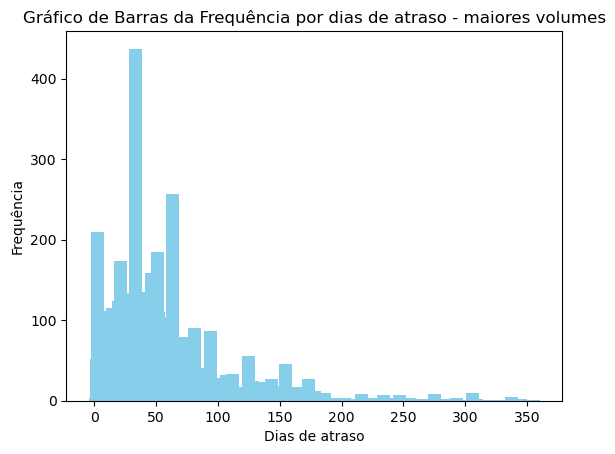

In [175]:
# Gráfico das quantidades de contratos por dias de atraso

frequencia = df['Atraso'].value_counts()
frequencia

tabela_frequencia = pd.DataFrame({'Atraso': frequencia.index, 'Frequencia': frequencia.values})
plt.bar(tabela_frequencia['Atraso'], tabela_frequencia['Frequencia'], color='skyblue', width=10.5)

# Adicionar rótulos e título
plt.xlabel('Dias de atraso')
plt.ylabel('Frequência')
plt.title('Gráfico de Barras da Frequência por dias de atraso - maiores volumes')

# Exibir o gráfico
plt.show()

In [176]:
# Agrupando dados por Grupo e Saldo_Potencial, obtendo a média do atraso
df_agg = df.groupby(['Grupo', 'Saldo_Potencial']).agg({'Atraso' : 'mean'}).reset_index()
df_agg

,Grupo,Saldo_Potencial,Atraso
0,30,2.15205,9.0
1,30,2.40170,7.0
2,30,2.45660,8.0
3,30,2.46635,11.0
4,30,2.69360,18.0
...,...,...,...
8739,365,26210.25000,293.0
8740,365,32949.42000,240.0
8741,365,35777.72000,234.0
8742,365,41792.11000,199.0


Text(0.5, 0, 'Dias de Atraso')

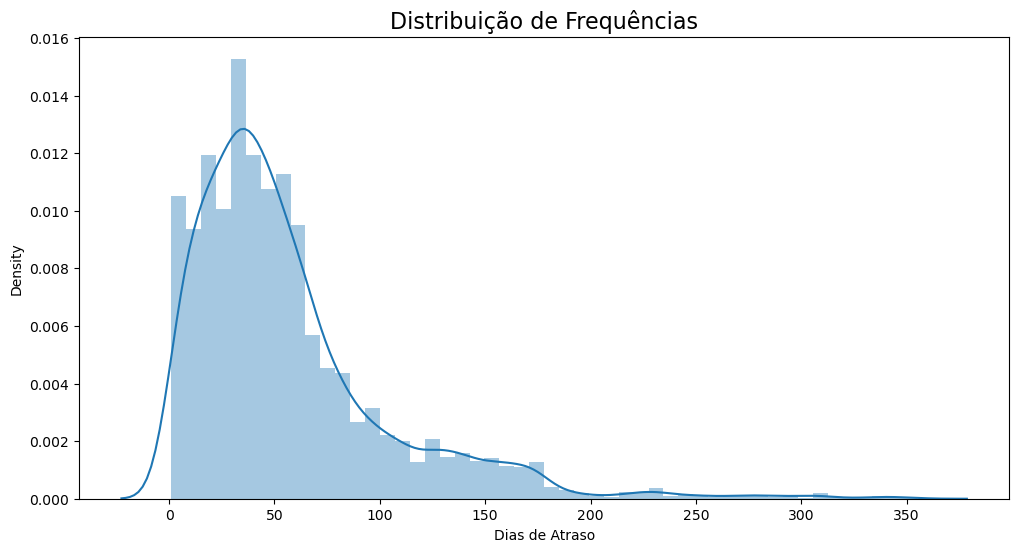

In [177]:
# Curva sobre a distribuição de Frequêcias

ax = sns.distplot(df_agg['Atraso'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências', fontsize = 16)
ax.set_xlabel('Dias de Atraso')

In [178]:
# Agrupando dados por Grupo, obtendo a média do valor das parcelas atrasadas
df_agg = df.groupby(['Grupo']).agg({'Saldo_Potencial' : 'mean'}).reset_index()

<Axes: title={'center': 'Valor das Parcelas'}, xlabel='Reais'>

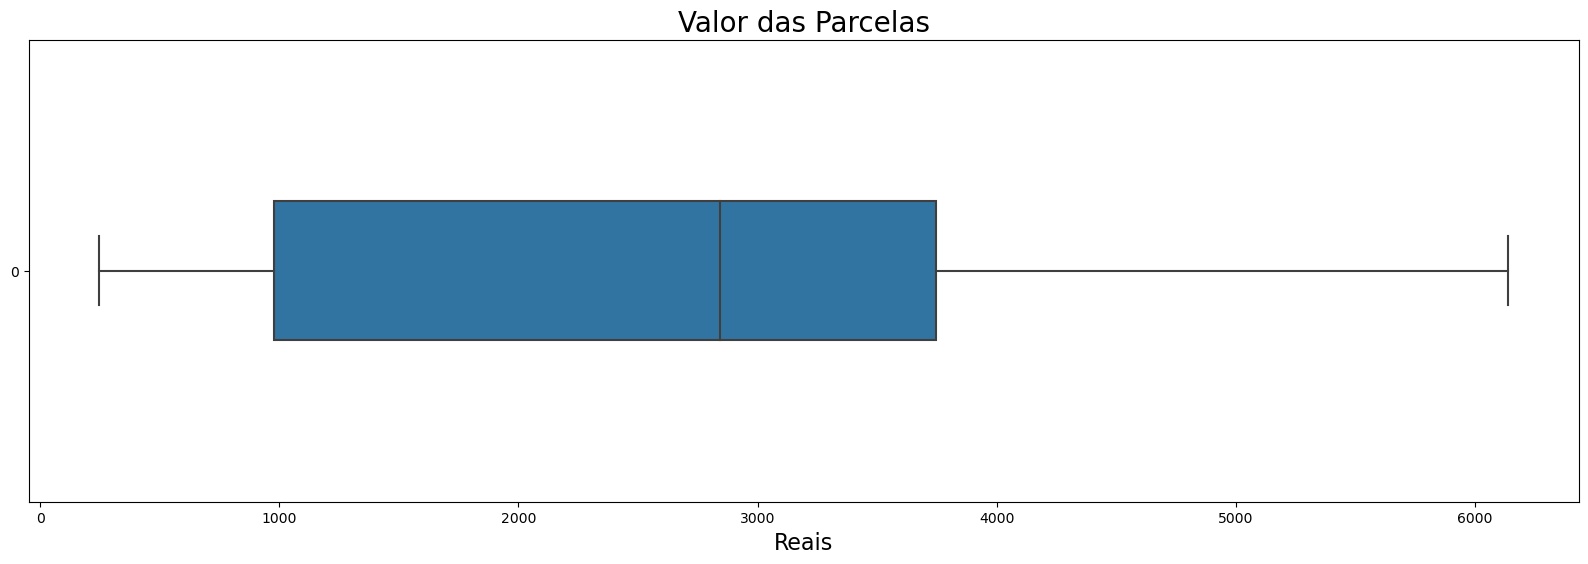

In [179]:
# Boxplot utilizando valores agrupados
ax = sns.boxplot(data = df_agg['Saldo_Potencial'], orient = 'h', width = 0.3)
ax.figure.set_size_inches(20, 6)
ax.set_title('Valor das Parcelas', fontsize=20)
ax.set_xlabel('Reais', fontsize=16)
ax

In [180]:
# Descrição da coluna Saldo_Potencial

df['Saldo_Potencial'].describe().round(2)

count     8768.00
mean      1587.48
std       2419.96
min          2.15
25%        278.57
50%        769.32
75%       1962.32
max      46121.07
Name: Saldo_Potencial, dtype: float64

In [181]:
# Saldo total das pacelas em atraso
print ('Total das parcelas em atraso: R$ ', df['Saldo_Potencial'].sum().round(2))

Total das parcelas em atraso: R$  13918991.61


# Análise dos Dados por Grupo

In [182]:
# Grupo 30

grupo_30 = df[df['Grupo'].eq(30)]
grupo_30['Saldo_Potencial'].describe().round(2)


count    2674.00
mean      246.46
std       218.42
min         2.15
25%        85.88
50%       184.35
75%       349.64
max      1796.22
Name: Saldo_Potencial, dtype: float64

In [183]:
# Saldo total das pacelas em atraso do grupo 30
saldo_potencial_grupo30 = grupo_30['Saldo_Potencial'].sum().round(2)
print ('Total das parcelas em atraso: R$ ', saldo_potencial_grupo30)

Total das parcelas em atraso: R$  659045.22


In [184]:
# Grupo 60

grupo_60 = df[df['Grupo'].eq(60)]
grupo_60['Saldo_Potencial'].describe().round(2)

count    3134.00
mean      978.40
std       713.24
min        16.97
25%       496.42
50%       840.94
75%      1276.11
max      8427.12
Name: Saldo_Potencial, dtype: float64

In [185]:
# Saldo total das pacelas em atraso do grupo 60
saldo_potencial_grupo60 = grupo_60['Saldo_Potencial'].sum().round(2)
print ('Total das parcelas em atraso: R$ ', saldo_potencial_grupo60)

Total das parcelas em atraso: R$  3066314.23


In [186]:
# Grupo 90

grupo_90 = df[df['Grupo'].eq(90)]
grupo_90['Saldo_Potencial'].describe().round(2)

count     1472.00
mean      2842.87
std       2102.13
min         10.76
25%       1343.25
50%       2484.03
75%       3769.64
max      17965.13
Name: Saldo_Potencial, dtype: float64

In [187]:
# Saldo total das pacelas em atraso do grupo 90
saldo_potencial_grupo90 = grupo_90['Saldo_Potencial'].sum().round(2)
print ('Total das parcelas em atraso: R$ ', saldo_potencial_grupo90)

Total das parcelas em atraso: R$  4184697.95


In [188]:
# Grupo 180

grupo_180 = df[df['Grupo'].eq(180)]
grupo_180['Saldo_Potencial'].describe().round(2)

count     1307.00
mean      3747.51
std       3438.52
min          9.15
25%       1821.44
50%       3127.39
75%       4712.84
max      46093.73
Name: Saldo_Potencial, dtype: float64

In [189]:
# Saldo total das pacelas em atraso do grupo 180
saldo_potencial_grupo180 = grupo_180['Saldo_Potencial'].sum().round(2)
print ('Total das parcelas em atraso: R$ ', saldo_potencial_grupo180)

Total das parcelas em atraso: R$  4898002.1


In [190]:
# Grupo 365

grupo_365 = df[df['Grupo'].eq(365)]
grupo_365['Saldo_Potencial'].describe().round(2)

count      181.00
mean      6137.75
std       7280.64
min        186.10
25%        794.48
50%       4915.88
75%       8095.38
max      46121.07
Name: Saldo_Potencial, dtype: float64

In [191]:
# Saldo total das pacelas em atraso do grupo 365
saldo_potencial_grupo365 = grupo_365['Saldo_Potencial'].sum().round(2)
print ('Total das parcelas em atraso: R$ ', saldo_potencial_grupo365)

Total das parcelas em atraso: R$  1110932.12


# Modelos de Machine Learning

## Grupo 30

In [272]:
#-------------------------#
# Média Aritmética para identificar potenciais pagamentos #
# Quanto menor o tempo no grupo, maior a chance de recuperação de crédito #
# Se os dias de atraso forem menores do que a média o valor do campo Recuperar será igual a 1 #
# Se os dias de atraso forem maiores ou iguais a média o valor do campo será igual a 0 #
#-------------------------#

coluna_unica = grupo_30['Atraso'].drop_duplicates()
media_aritmetica = coluna_unica.mean()
media_aritmetica

grupo_30['Recuperar'] = grupo_30['Atraso'].apply(lambda x: 0 if x > media_aritmetica else (1 if x < media_aritmetica else 0))



# Separar as variáveis independentes (X) e a variável dependente (y)
#-------------------------#
# VARIÁVEIS INDEPENDENTES #
#-------------------------#
X = grupo_30[['Saldo_Recuperado', 'Saldo', 'Atraso']]

#---------------------#
# VARIÁVEL DEPENDENTE #
#---------------------#
y = grupo_30['Recuperar']


#------------------------------------------------#
# DIVIDINDO DADOS EM CONJUNTOS DE TREINO E TESTE #
#------------------------------------------------#

# 70% PARA TREINO
# 30% PARA TESTE
X_train_30, X_test_30, y_train_30, y_test_30 = train_test_split(X, y, test_size=0.3, random_state=42)

# Inicializar o modelo de regressão logística
modelo = LogisticRegression()

# Treinar o modelo
modelo.fit(X_train_30, y_train_30)

# Fazer previsões no conjunto de teste
previsoes = modelo.predict(X_test_30)

# Avaliar a precisão do modelo
precisao = accuracy_score(y_test, previsoes)
print(f'Precisão do Modelo: {precisao}')



Precisão do Modelo: 0.5454545454545454


In [273]:
#----------------------#
# INSTANCIANDO MODELOS #
#----------------------#

# Linear Regression
modelo_lr_30 = LinearRegression()

# Lasso (L1)
modelo_lasso_30 = Lasso()

# Ridge (L2)
modelo_ridge_30 = Ridge()

# ElasticNet (L1 + L2)
modelo_elasticnet_30 = ElasticNet()

# Decision Tree Regressor
modelo_dt_30 = DecisionTreeRegressor()

# Random Forest Regressor
modelo_rf_30 = RandomForestRegressor()

In [274]:
#-------------------#
# AJUSTANDO MODELOS #
#-------------------#

# Treinar o modelo
modelo_lr_30.fit(X_train_30, y_train_30)

# Lasso (L1)
modelo_lasso_30 = Lasso()

# Ridge (L2)
modelo_ridge_30 = Ridge()

# ElasticNet (L1 + L2)
modelo_elasticnet_30 = ElasticNet()

# Decision Tree Regressor
modelo_dt_30 = DecisionTreeRegressor()

# Random Forest Regressor
modelo_rf_30 = RandomForestRegressor()


In [275]:
#-------------------#
# AJUSTANDO MODELOS #
#-------------------#

# Linear Regression
modelo_lr_30.fit(X_train_30, y_train_30)

# Lasso (L1)
modelo_lasso_30.fit(X_train_30, y_train_30)

# Ridge (L2)
modelo_ridge_30.fit(X_train_30, y_train_30)

# ElasticNet (L1 + L2)
modelo_elasticnet_30.fit(X_train_30, y_train_30)

# Decision Tree Regressor
modelo_dt_30.fit(X_train_30, y_train_30)

# Random Forest Regressor
modelo_rf_30.fit(X_train_30, y_train_30)

RandomForestRegressor()

In [276]:
#-------------------------------#
# MÉTRICAS PARA DADOS DE TREINO #
#-------------------------------#

#-----------------------------#
# Definindo um valor previsto #
#-----------------------------#

# Linear Regression
y_previsto_train_lr_30 = modelo_lr_30.predict(X_train_30)

# Lasso (L1)
y_previsto_train_lasso_30 = modelo_lasso_30.predict(X_train_30)

# Ridge (L2)
y_previsto_train_ridge_30 = modelo_ridge_30.predict(X_train_30)

# ElasticNet (L1 + L2)
y_previsto_train_elasticnet_30 = modelo_elasticnet_30.predict(X_train_30)

# Decision Tree Regressor
y_previsto_train_dt_30 = modelo_dt_30.predict(X_train_30)

# Random Forest Regressor
y_previsto_train_rf_30 = modelo_rf_30.predict(X_train_30)

#---------------------#
# Calculando métricas #
#---------------------#

#-------------------#
# Linear Regression #
#-------------------#
print('---------------------------------')
print('--      LINEAR REGRESSION      --')
print('---------------------------------')

modelo_mae_train_lr_30 = mean_absolute_error(y_train_30, y_previsto_train_lr_30)
print('MAE  Treino = {0:.2f}'.format(modelo_mae_train_lr_30))

modelo_mse_train_lr_30 = mean_squared_error(y_train_30, y_previsto_train_lr_30)
modelo_rmse_train_lr_30 = math.sqrt(modelo_mse_train_lr_30)
print('RMSE Treino = {0:.2f}'.format(modelo_rmse_train_lr_30))

modelo_r2_train_lr_30 = modelo_lr_30.score(X_train_30, y_train_30)
print('R²   Treino = {0:.2f}'.format(modelo_r2_train_lr_30))

#-------------------#
# Ajuste Lasso (L1) #
#-------------------#
print('---------------------------------')
print('--      AJUSTE LASSO (L1)      --')
print('---------------------------------')

modelo_mae_train_lasso_30 = mean_absolute_error(y_train_30, y_previsto_train_lasso_30)
print('MAE  Treino = {0:.2f}'.format(modelo_mae_train_lasso_30))

modelo_mse_train_lasso_30 = mean_squared_error(y_train_30, y_previsto_train_lasso_30)
modelo_rmse_train_lasso_30 = math.sqrt(modelo_mse_train_lasso_30)
print('RMSE Treino = {0:.2f}'.format(modelo_rmse_train_lasso_30))

modelo_r2_train_lasso_30 = modelo_lasso_30.score(X_train_30, y_train_30)
print('R²   Treino = {0:.2f}'.format(modelo_r2_train_lasso_30))

#-------------------#
# Ajuste Ridge (L2) #
#-------------------#
print('---------------------------------')
print('--      AJUSTE RIDGE (L2)      --')
print('---------------------------------')

modelo_mae_train_ridge_30 = mean_absolute_error(y_train_30, y_previsto_train_ridge_30)
print('MAE  Treino = {0:.2f}'.format(modelo_mae_train_ridge_30))

modelo_mse_train_ridge_30 = mean_squared_error(y_train_30, y_previsto_train_ridge_30)
modelo_rmse_train_ridge_30 = math.sqrt(modelo_mse_train_ridge_30)
print('RMSE Treino = {0:.2f}'.format(modelo_rmse_train_ridge_30))

modelo_r2_train_ridge_30 = modelo_ridge_30.score(X_train_30, y_train_30)
print('R²   Treino = {0:.2f}'.format(modelo_r2_train_ridge_30))

#-----------------------------#
# Ajuste ElasticNet (L1 + L2) #
#-----------------------------#
print('---------------------------------')
print('-- AJUSTE ELASTICNET (L1 + L2) --')
print('---------------------------------')

modelo_mae_train_elasticnet_30 = mean_absolute_error(y_train_30, y_previsto_train_elasticnet_30)
print('MAE  Treino = {0:.2f}'.format(modelo_mae_train_elasticnet_30))

modelo_mse_train_elasticnet_30 = mean_squared_error(y_train_30, y_previsto_train_elasticnet_30)
modelo_rmse_train_elasticnet_30 = math.sqrt(modelo_mse_train_elasticnet_30)
print('RMSE Treino = {0:.2f}'.format(modelo_rmse_train_elasticnet_30))

modelo_r2_train_elasticnet_30 = modelo_elasticnet_30.score(X_train_30, y_train_30)
print('R²   Treino = {0:.2f}'.format(modelo_r2_train_elasticnet_30))

#-------------------------#
# Decision Tree Regressor #
#-------------------------#
print('---------------------------------')
print('--   DECISION TREE REGRESSOR   --')
print('---------------------------------')

modelo_mae_train_dt_30 = mean_absolute_error(y_train_30, y_previsto_train_dt_30)
print('MAE  Treino = {0:.2f}'.format(modelo_mae_train_dt_30))

modelo_mse_train_dt_30 = mean_squared_error(y_train_30, y_previsto_train_dt_30)
modelo_rmse_train_dt_30 = math.sqrt(modelo_mse_train_dt_30)
print('RMSE Treino = {0:.2f}'.format(modelo_rmse_train_dt_30))

modelo_r2_train_dt_30 = modelo_dt_30.score(X_train_30, y_train_30)
print('R²   Treino = {0:.2f}'.format(modelo_r2_train_dt_30))

#-------------------------#
# Random Forest Regressor #
#-------------------------#
print('---------------------------------')
print('--   RANDOM FOREST REGRESSOR   --')
print('---------------------------------')

modelo_mae_train_rf_30 = mean_absolute_error(y_train_30, y_previsto_train_rf_30)
print('MAE  Treino = {0:.2f}'.format(modelo_mae_train_rf_30))

modelo_mse_train_rf_30 = mean_squared_error(y_train_30, y_previsto_train_rf_30)
modelo_rmse_train_rf_30 = math.sqrt(modelo_mse_train_rf_30)
print('RMSE Treino = {0:.2f}'.format(modelo_rmse_train_rf_30))

modelo_r2_train_rf_30 = modelo_rf_30.score(X_train_30, y_train_30)
print('R²   Treino = {0:.2f}'.format(modelo_r2_train_rf_30))

---------------------------------
--      LINEAR REGRESSION      --
---------------------------------
MAE  Treino = 0.18
RMSE Treino = 0.23
R²   Treino = 0.79
---------------------------------
--      AJUSTE LASSO (L1)      --
---------------------------------
MAE  Treino = 0.22
RMSE Treino = 0.27
R²   Treino = 0.70
---------------------------------
--      AJUSTE RIDGE (L2)      --
---------------------------------
MAE  Treino = 0.18
RMSE Treino = 0.23
R²   Treino = 0.79
---------------------------------
-- AJUSTE ELASTICNET (L1 + L2) --
---------------------------------
MAE  Treino = 0.19
RMSE Treino = 0.24
R²   Treino = 0.76
---------------------------------
--   DECISION TREE REGRESSOR   --
---------------------------------
MAE  Treino = 0.00
RMSE Treino = 0.00
R²   Treino = 1.00
---------------------------------
--   RANDOM FOREST REGRESSOR   --
---------------------------------
MAE  Treino = 0.00
RMSE Treino = 0.00
R²   Treino = 1.00


In [303]:
#------------------------------#
# MÉTRICAS PARA DADOS DE TESTE #
#------------------------------#

#-----------------------------#
# Definindo um valor previsto #
#-----------------------------#

# Linear Regression
y_previsto_test_lr_30 = modelo_lr_30.predict(X_test_30)

# Lasso (L1)
y_previsto_test_lasso_30 = modelo_lasso_30.predict(X_test_30)

# Ridge (L2)
y_previsto_test_ridge_30 = modelo_ridge_30.predict(X_test_30)

# ElasticNet (L1 + L2)
y_previsto_test_elasticnet_30 = modelo_elasticnet_30.predict(X_test_30)

# Decision Tree Regressor
y_previsto_test_dt_30 = modelo_dt_30.predict(X_test_30)

# Random Forest Regressor
y_previsto_test_rf_30 = modelo_rf_30.predict(X_test_30)

#---------------------#
# Calculando métricas #
#---------------------#

#-------------------#
# Linear Regression #
#-------------------#
print('---------------------------------')
print('--      LINEAR REGRESSION      --')
print('---------------------------------')

modelo_mae_test_lr_30 = mean_absolute_error(y_test_30, y_previsto_test_lr_30)
print('MAE  Teste = {0:.2f}'.format(modelo_mae_test_lr_30))

modelo_mse_test_lr_30 = mean_squared_error(y_test_30, y_previsto_test_lr_30)
modelo_rmse_test_lr_30 = math.sqrt(modelo_mse_test_lr_30)
print('RMSE Teste = {0:.2f}'.format(modelo_rmse_test_lr_30))

modelo_r2_test_lr_30 = modelo_lr_30.score(X_test_30, y_test_30)
print('R²   Teste = {0:.2f}'.format(modelo_r2_test_lr_30))

#-------------------#
# Ajuste Lasso (L1) #
#-------------------#
print('---------------------------------')
print('--      AJUSTE LASSO (L1)      --')
print('---------------------------------')

modelo_mae_test_lasso_30 = mean_absolute_error(y_test_30, y_previsto_test_lasso_30)
print('MAE  Teste = {0:.2f}'.format(modelo_mae_test_lasso_30))

modelo_mse_test_lasso_30 = mean_squared_error(y_test_30, y_previsto_test_lasso_30)
modelo_rmse_test_lasso_30 = math.sqrt(modelo_mse_test_lasso_30)
print('RMSE Teste = {0:.2f}'.format(modelo_rmse_test_lasso_30))

modelo_r2_test_lasso_30 = modelo_lasso_30.score(X_test_30, y_test_30)
print('R²   Teste = {0:.2f}'.format(modelo_r2_test_lasso_30))

#-------------------#
# Ajuste Ridge (L2) #
#-------------------#
print('---------------------------------')
print('--      AJUSTE RIDGE (L2)      --')
print('---------------------------------')

modelo_mae_test_ridge_30 = mean_absolute_error(y_test_30, y_previsto_test_ridge_30)
print('MAE  Teste = {0:.2f}'.format(modelo_mae_test_ridge_30))

modelo_mse_test_ridge_30 = mean_squared_error(y_test_30, y_previsto_test_ridge_30)
modelo_rmse_test_ridge_30 = math.sqrt(modelo_mse_test_ridge_30)
print('RMSE Teste = {0:.2f}'.format(modelo_rmse_test_ridge_30))

modelo_r2_test_ridge_30 = modelo_ridge_30.score(X_test_30, y_test_30)
print('R²   Teste = {0:.2f}'.format(modelo_r2_test_ridge_30))

#-----------------------------#
# Ajuste ElastciNet (L1 + L2) #
#-----------------------------#
print('---------------------------------')
print('-- AJUSTE ELASTICNET (L1 + L2) --')
print('---------------------------------')

modelo_mae_test_elasticnet_30 = mean_absolute_error(y_test_30, y_previsto_test_elasticnet_30)
print('MAE  Teste = {0:.2f}'.format(modelo_mae_test_elasticnet_30))

modelo_mse_test_elasticnet_30 = mean_squared_error(y_test_30, y_previsto_test_elasticnet_30)
modelo_rmse_test_elasticnet_30 = math.sqrt(modelo_mse_test_elasticnet_30)
print('RMSE Teste = {0:.2f}'.format(modelo_rmse_test_elasticnet_30))

modelo_r2_test_elasticnet_30 = modelo_elasticnet_30.score(X_test_30, y_test_30)
print('R²   Teste = {0:.2f}'.format(modelo_r2_test_elasticnet_30))

#-------------------------#
# Decision Tree Regressor #
#-------------------------#
print('---------------------------------')
print('--   DECISION TREE REGRESSOR   --')
print('---------------------------------')

modelo_mae_test_dt_30 = mean_absolute_error(y_test_30, y_previsto_test_dt_30)
print('MAE  Teste = {0:.2f}'.format(modelo_mae_test_dt_30))

modelo_mse_test_dt_30 = mean_squared_error(y_test_30, y_previsto_test_dt_30)
modelo_rmse_test_dt_30 = math.sqrt(modelo_mse_test_dt_30)
print('RMSE Teste = {0:.2f}'.format(modelo_rmse_test_dt_30))

modelo_r2_test_dt_30 = modelo_dt_30.score(X_test_30, y_test_30)
print('R²   Teste = {0:.2f}'.format(modelo_r2_test_dt_30))

#-------------------------#
# Random Forest Regressor #
#-------------------------#
print('---------------------------------')
print('--   RANDOM FOREST REGRESSOR   --')
print('---------------------------------')

modelo_mae_test_rf_30 = mean_absolute_error(y_test_30, y_previsto_test_rf_30)
print('MAE  Teste = {0:.2f}'.format(modelo_mae_test_rf_30))

modelo_mse_test_rf_30 = mean_squared_error(y_test_30, y_previsto_test_rf_30)
modelo_rmse_test_rf_30 = math.sqrt(modelo_mse_test_rf_30)
print('RMSE Teste = {0:.2f}'.format(modelo_rmse_test_rf_30))

modelo_r2_test_rf_30 = modelo_rf_30.score(X_test_30, y_test_30)
print('R²   Teste = {0:.2f}'.format(modelo_r2_test_rf_30))

---------------------------------
--      LINEAR REGRESSION      --
---------------------------------
MAE  Teste = 0.19
RMSE Teste = 0.24
R²   Teste = 0.77
---------------------------------
--      AJUSTE LASSO (L1)      --
---------------------------------
MAE  Teste = 0.23
RMSE Teste = 0.28
R²   Teste = 0.69
---------------------------------
--      AJUSTE RIDGE (L2)      --
---------------------------------
MAE  Teste = 0.19
RMSE Teste = 0.24
R²   Teste = 0.77
---------------------------------
-- AJUSTE ELASTICNET (L1 + L2) --
---------------------------------
MAE  Teste = 0.20
RMSE Teste = 0.25
R²   Teste = 0.75
---------------------------------
--   DECISION TREE REGRESSOR   --
---------------------------------
MAE  Teste = 0.00
RMSE Teste = 0.00
R²   Teste = 1.00
---------------------------------
--   RANDOM FOREST REGRESSOR   --
---------------------------------
MAE  Teste = 0.00
RMSE Teste = 0.00
R²   Teste = 1.00


## Grupo 60

In [278]:
#-------------------------#
# Média Aritmética para identificar potenciais pagamentos #
# Quanto menor o tempo no grupo, maior a chance de recuperação de crédito #
# Se os dias de atraso forem menores do que a média o valor do campo Recuperar será igual a 1 #
# Se os dias de atraso forem maiores ou iguais a média o valor do campo será igual a 0 #
#-------------------------#

coluna_unica = grupo_60['Atraso'].drop_duplicates()
media_aritmetica = coluna_unica.mean()
media_aritmetica

grupo_60['Recuperar'] = grupo_60['Atraso'].apply(lambda x: 0 if x > media_aritmetica else (1 if x < media_aritmetica else 0))



# Separar as variáveis independentes (X) e a variável dependente (y)
#-------------------------#
# VARIÁVEIS INDEPENDENTES #
#-------------------------#
X = grupo_60[['Saldo_Recuperado', 'Saldo', 'Atraso']]

#---------------------#
# VARIÁVEL DEPENDENTE #
#---------------------#
y = grupo_60['Recuperar']


#------------------------------------------------#
# DIVIDINDO DADOS EM CONJUNTOS DE TREINO E TESTE #
#------------------------------------------------#

# 70% PARA TREINO
# 30% PARA TESTE
X_train_60, X_test_60, y_train_60, y_test_60 = train_test_split(X, y, test_size=0.3, random_state=42)

# Inicializar o modelo de regressão logística
modelo = LogisticRegression()

# Treinar o modelo
modelo.fit(X_train_60, y_train_60)

# Fazer previsões no conjunto de teste
previsoes = modelo.predict(X_test_60)

# Avaliar a precisão do modelo
precisao = accuracy_score(y_test_60, previsoes)
print(f'Precisão do Modelo: {precisao}')


Precisão do Modelo: 1.0


In [279]:
#----------------------#
# INSTANCIANDO MODELOS #
#----------------------#

# Linear Regression
modelo_lr_60 = LinearRegression()

# Lasso (L1)
modelo_lasso_60 = Lasso()

# Ridge (L2)
modelo_ridge_60 = Ridge()

# ElasticNet (L1 + L2)
modelo_elasticnet_60 = ElasticNet()

# Decision Tree Regressor
modelo_dt_60 = DecisionTreeRegressor()

# Random Forest Regressor
modelo_rf_60 = RandomForestRegressor()


In [280]:

#-------------------#
# AJUSTANDO MODELOS #
#-------------------#

# Treinar o modelo
modelo_lr_60.fit(X_train_60, y_train_60)

# Lasso (L1)
modelo_lasso_60 = Lasso()

# Ridge (L2)
modelo_ridge_60 = Ridge()

# ElasticNet (L1 + L2)
modelo_elasticnet_60 = ElasticNet()

# Decision Tree Regressor
modelo_dt_60 = DecisionTreeRegressor()

# Random Forest Regressor
modelo_rf_60 = RandomForestRegressor()


In [281]:
#-------------------#
# AJUSTANDO MODELOS #
#-------------------#

# Linear Regression
modelo_lr_60.fit(X_train_60, y_train_60)

# Lasso (L1)
modelo_lasso_60.fit(X_train_60, y_train_60)

# Ridge (L2)
modelo_ridge_60.fit(X_train_60, y_train_60)

# ElasticNet (L1 + L2)
modelo_elasticnet_60.fit(X_train_60, y_train_60)

# Decision Tree Regressor
modelo_dt_60.fit(X_train_60, y_train_60)

# Random Forest Regressor
modelo_rf_60.fit(X_train_60, y_train_60)


RandomForestRegressor()

In [282]:
#-------------------------------#
# MÉTRICAS PARA DADOS DE TREINO #
#-------------------------------#

#-----------------------------#
# Definindo um valor previsto #
#-----------------------------#

# Linear Regression
y_previsto_train_lr_60 = modelo_lr_60.predict(X_train_60)

# Lasso (L1)
y_previsto_train_lasso_60 = modelo_lasso_60.predict(X_train_60)

# Ridge (L2)
y_previsto_train_ridge_60 = modelo_ridge_60.predict(X_train_60)

# ElasticNet (L1 + L2)
y_previsto_train_elasticnet_60 = modelo_elasticnet_60.predict(X_train_60)

# Decision Tree Regressor
y_previsto_train_dt_60 = modelo_dt_60.predict(X_train_60)

# Random Forest Regressor
y_previsto_train_rf_60 = modelo_rf_60.predict(X_train_60)

#---------------------#
# Calculando métricas #
#---------------------#

#-------------------#
# Linear Regression #
#-------------------#
print('---------------------------------')
print('--      LINEAR REGRESSION      --')
print('---------------------------------')

modelo_mae_train_lr_60 = mean_absolute_error(y_train_60, y_previsto_train_lr_60)
print('MAE  Treino = {0:.2f}'.format(modelo_mae_train_lr_60))

modelo_mse_train_lr_60 = mean_squared_error(y_train_60, y_previsto_train_lr_60)
modelo_rmse_train_lr_60 = math.sqrt(modelo_mse_train_lr_60)
print('RMSE Treino = {0:.2f}'.format(modelo_rmse_train_lr_60))

modelo_r2_train_lr_60 = modelo_lr_60.score(X_train_60, y_train_60)
print('R²   Treino = {0:.2f}'.format(modelo_r2_train_lr_60))

#-------------------#
# Ajuste Lasso (L1) #
#-------------------#
print('---------------------------------')
print('--      AJUSTE LASSO (L1)      --')
print('---------------------------------')

modelo_mae_train_lasso_60 = mean_absolute_error(y_train_60, y_previsto_train_lasso_60)
print('MAE  Treino = {0:.2f}'.format(modelo_mae_train_lasso_60))

modelo_mse_train_lasso_60 = mean_squared_error(y_train_60, y_previsto_train_lasso_60)
modelo_rmse_train_lasso_60 = math.sqrt(modelo_mse_train_lasso_60)
print('RMSE Treino = {0:.2f}'.format(modelo_rmse_train_lasso_60))

modelo_r2_train_lasso_60 = modelo_lasso_60.score(X_train_60, y_train_60)
print('R²   Treino = {0:.2f}'.format(modelo_r2_train_lasso_60))

#-------------------#
# Ajuste Ridge (L2) #
#-------------------#
print('---------------------------------')
print('--      AJUSTE RIDGE (L2)      --')
print('---------------------------------')

modelo_mae_train_ridge_60 = mean_absolute_error(y_train_60, y_previsto_train_ridge_60)
print('MAE  Treino = {0:.2f}'.format(modelo_mae_train_ridge_60))

modelo_mse_train_ridge_60 = mean_squared_error(y_train_60, y_previsto_train_ridge_60)
modelo_rmse_train_ridge_60 = math.sqrt(modelo_mse_train_ridge_60)
print('RMSE Treino = {0:.2f}'.format(modelo_rmse_train_ridge_60))

modelo_r2_train_ridge_60 = modelo_ridge_60.score(X_train_60, y_train_60)
print('R²   Treino = {0:.2f}'.format(modelo_r2_train_ridge_60))

#-----------------------------#
# Ajuste ElasticNet (L1 + L2) #
#-----------------------------#
print('---------------------------------')
print('-- AJUSTE ELASTICNET (L1 + L2) --')
print('---------------------------------')

modelo_mae_train_elasticnet_60 = mean_absolute_error(y_train_60, y_previsto_train_elasticnet_60)
print('MAE  Treino = {0:.2f}'.format(modelo_mae_train_elasticnet_60))

modelo_mse_train_elasticnet_60 = mean_squared_error(y_train_60, y_previsto_train_elasticnet_60)
modelo_rmse_train_elasticnet_60 = math.sqrt(modelo_mse_train_elasticnet_60)
print('RMSE Treino = {0:.2f}'.format(modelo_rmse_train_elasticnet_60))

modelo_r2_train_elasticnet_60 = modelo_elasticnet_60.score(X_train_60, y_train_60)
print('R²   Treino = {0:.2f}'.format(modelo_r2_train_elasticnet_60))

#-------------------------#
# Decision Tree Regressor #
#-------------------------#
print('---------------------------------')
print('--   DECISION TREE REGRESSOR   --')
print('---------------------------------')

modelo_mae_train_dt_60 = mean_absolute_error(y_train_60, y_previsto_train_dt_60)
print('MAE  Treino = {0:.2f}'.format(modelo_mae_train_dt_60))

modelo_mse_train_dt_60 = mean_squared_error(y_train_60, y_previsto_train_dt_60)
modelo_rmse_train_dt_60 = math.sqrt(modelo_mse_train_dt_60)
print('RMSE Treino = {0:.2f}'.format(modelo_rmse_train_dt_60))

modelo_r2_train_dt_60 = modelo_dt_60.score(X_train_60, y_train_60)
print('R²   Treino = {0:.2f}'.format(modelo_r2_train_dt_60))

#-------------------------#
# Random Forest Regressor #
#-------------------------#
print('---------------------------------')
print('--   RANDOM FOREST REGRESSOR   --')
print('---------------------------------')

modelo_mae_train_rf_60 = mean_absolute_error(y_train_60, y_previsto_train_rf_60)
print('MAE  Treino = {0:.2f}'.format(modelo_mae_train_rf_60))

modelo_mse_train_rf_60 = mean_squared_error(y_train_60, y_previsto_train_rf_60)
modelo_rmse_train_rf_60 = math.sqrt(modelo_mse_train_rf_60)
print('RMSE Treino = {0:.2f}'.format(modelo_rmse_train_rf_60))

modelo_r2_train_rf_60 = modelo_rf_60.score(X_train_60, y_train_60)
print('R²   Treino = {0:.2f}'.format(modelo_r2_train_rf_60))

---------------------------------
--      LINEAR REGRESSION      --
---------------------------------
MAE  Treino = 0.21
RMSE Treino = 0.25
R²   Treino = 0.74
---------------------------------
--      AJUSTE LASSO (L1)      --
---------------------------------
MAE  Treino = 0.23
RMSE Treino = 0.28
R²   Treino = 0.68
---------------------------------
--      AJUSTE RIDGE (L2)      --
---------------------------------
MAE  Treino = 0.21
RMSE Treino = 0.25
R²   Treino = 0.74
---------------------------------
-- AJUSTE ELASTICNET (L1 + L2) --
---------------------------------
MAE  Treino = 0.21
RMSE Treino = 0.26
R²   Treino = 0.72
---------------------------------
--   DECISION TREE REGRESSOR   --
---------------------------------
MAE  Treino = 0.00
RMSE Treino = 0.00
R²   Treino = 1.00
---------------------------------
--   RANDOM FOREST REGRESSOR   --
---------------------------------
MAE  Treino = 0.00
RMSE Treino = 0.00
R²   Treino = 1.00


In [304]:
#------------------------------#
# MÉTRICAS PARA DADOS DE TESTE #
#------------------------------#

#-----------------------------#
# Definindo um valor previsto #
#-----------------------------#

# Linear Regression
y_previsto_test_lr_60 = modelo_lr_60.predict(X_test_60)

# Lasso (L1)
y_previsto_test_lasso_60 = modelo_lasso_60.predict(X_test_60)

# Ridge (L2)
y_previsto_test_ridge_60 = modelo_ridge_60.predict(X_test_60)

# ElasticNet (L1 + L2)
y_previsto_test_elasticnet_60 = modelo_elasticnet_60.predict(X_test_60)

# Decision Tree Regressor
y_previsto_test_dt_60 = modelo_dt_60.predict(X_test_60)

# Random Forest Regressor
y_previsto_test_rf_60 = modelo_rf_60.predict(X_test_60)

#---------------------#
# Calculando métricas #
#---------------------#

#-------------------#
# Linear Regression #
#-------------------#
print('---------------------------------')
print('--      LINEAR REGRESSION      --')
print('---------------------------------')

modelo_mae_test_lr_60 = mean_absolute_error(y_test_60, y_previsto_test_lr_60)
print('MAE  Teste = {0:.2f}'.format(modelo_mae_test_lr_60))

modelo_mse_test_lr_60 = mean_squared_error(y_test_60, y_previsto_test_lr_60)
modelo_rmse_test_lr_60 = math.sqrt(modelo_mse_test_lr_60)
print('RMSE Teste = {0:.2f}'.format(modelo_rmse_test_lr_60))

modelo_r2_test_lr_60 = modelo_lr_60.score(X_test_60, y_test_60)
print('R²   Teste = {0:.2f}'.format(modelo_r2_test_lr_60))

#-------------------#
# Ajuste Lasso (L1) #
#-------------------#
print('---------------------------------')
print('--      AJUSTE LASSO (L1)      --')
print('---------------------------------')

modelo_mae_test_lasso_60 = mean_absolute_error(y_test_60, y_previsto_test_lasso_60)
print('MAE  Teste = {0:.2f}'.format(modelo_mae_test_lasso_60))

modelo_mse_test_lasso_60 = mean_squared_error(y_test_60, y_previsto_test_lasso_60)
modelo_rmse_test_lasso_60 = math.sqrt(modelo_mse_test_lasso_60)
print('RMSE Teste = {0:.2f}'.format(modelo_rmse_test_lasso_60))

modelo_r2_test_lasso_60 = modelo_lasso_60.score(X_test_60, y_test_60)
print('R²   Teste = {0:.2f}'.format(modelo_r2_test_lasso_60))

#-------------------#
# Ajuste Ridge (L2) #
#-------------------#
print('---------------------------------')
print('--      AJUSTE RIDGE (L2)      --')
print('---------------------------------')

modelo_mae_test_ridge_60 = mean_absolute_error(y_test_60, y_previsto_test_ridge_60)
print('MAE  Teste = {0:.2f}'.format(modelo_mae_test_ridge_60))

modelo_mse_test_ridge_60 = mean_squared_error(y_test_60, y_previsto_test_ridge_60)
modelo_rmse_test_ridge_60 = math.sqrt(modelo_mse_test_ridge_60)
print('RMSE Teste = {0:.2f}'.format(modelo_rmse_test_ridge_60))

modelo_r2_test_ridge_60 = modelo_ridge_60.score(X_test_30, y_test_30)
print('R²   Teste = {0:.2f}'.format(modelo_r2_test_ridge_60))

#-----------------------------#
# Ajuste ElastciNet (L1 + L2) #
#-----------------------------#
print('---------------------------------')
print('-- AJUSTE ELASTICNET (L1 + L2) --')
print('---------------------------------')

modelo_mae_test_elasticnet_60 = mean_absolute_error(y_test_60, y_previsto_test_elasticnet_60)
print('MAE  Teste = {0:.2f}'.format(modelo_mae_test_elasticnet_60))

modelo_mse_test_elasticnet_60 = mean_squared_error(y_test_60, y_previsto_test_elasticnet_60)
modelo_rmse_test_elasticnet_60 = math.sqrt(modelo_mse_test_elasticnet_60)
print('RMSE Teste = {0:.2f}'.format(modelo_rmse_test_elasticnet_60))

modelo_r2_test_elasticnet_60 = modelo_elasticnet_60.score(X_test_60, y_test_60)
print('R²   Teste = {0:.2f}'.format(modelo_r2_test_elasticnet_60))

#-------------------------#
# Decision Tree Regressor #
#-------------------------#
print('---------------------------------')
print('--   DECISION TREE REGRESSOR   --')
print('---------------------------------')

modelo_mae_test_dt_60 = mean_absolute_error(y_test_60, y_previsto_test_dt_60)
print('MAE  Teste = {0:.2f}'.format(modelo_mae_test_dt_60))

modelo_mse_test_dt_60 = mean_squared_error(y_test_60, y_previsto_test_dt_60)
modelo_rmse_test_dt_60 = math.sqrt(modelo_mse_test_dt_60)
print('RMSE Teste = {0:.2f}'.format(modelo_rmse_test_dt_60))

modelo_r2_test_dt_60 = modelo_dt_60.score(X_test_60, y_test_60)
print('R²   Teste = {0:.2f}'.format(modelo_r2_test_dt_60))

#-------------------------#
# Random Forest Regressor #
#-------------------------#
print('---------------------------------')
print('--   RANDOM FOREST REGRESSOR   --')
print('---------------------------------')

modelo_mae_test_rf_60 = mean_absolute_error(y_test_60, y_previsto_test_rf_60)
print('MAE  Teste = {0:.2f}'.format(modelo_mae_test_rf_60))

modelo_mse_test_rf_60 = mean_squared_error(y_test_60, y_previsto_test_rf_60)
modelo_rmse_test_rf_60 = math.sqrt(modelo_mse_test_rf_60)
print('RMSE Teste = {0:.2f}'.format(modelo_rmse_test_rf_60))

modelo_r2_test_rf_60 = modelo_rf_60.score(X_test_60, y_test_60)
print('R²   Teste = {0:.2f}'.format(modelo_r2_test_rf_60))

---------------------------------
--      LINEAR REGRESSION      --
---------------------------------
MAE  Teste = 0.20
RMSE Teste = 0.24
R²   Teste = 0.76
---------------------------------
--      AJUSTE LASSO (L1)      --
---------------------------------
MAE  Teste = 0.23
RMSE Teste = 0.27
R²   Teste = 0.70
---------------------------------
--      AJUSTE RIDGE (L2)      --
---------------------------------
MAE  Teste = 0.20
RMSE Teste = 0.24
R²   Teste = -8.53
---------------------------------
-- AJUSTE ELASTICNET (L1 + L2) --
---------------------------------
MAE  Teste = 0.20
RMSE Teste = 0.25
R²   Teste = 0.74
---------------------------------
--   DECISION TREE REGRESSOR   --
---------------------------------
MAE  Teste = 0.00
RMSE Teste = 0.00
R²   Teste = 1.00
---------------------------------
--   RANDOM FOREST REGRESSOR   --
---------------------------------
MAE  Teste = 0.00
RMSE Teste = 0.00
R²   Teste = 1.00


## Grupo 90

In [283]:
#-------------------------#
# Média Aritmética para identificar potenciais pagamentos #
# Quanto menor o tempo no grupo, maior a chance de recuperação de crédito #
# Se os dias de atraso forem menores do que a média o valor do campo Recuperar será igual a 1 #
# Se os dias de atraso forem maiores ou iguais a média o valor do campo será igual a 0 #
#-------------------------#

coluna_unica = grupo_90['Atraso'].drop_duplicates()
media_aritmetica = coluna_unica.mean()
media_aritmetica

grupo_90['Recuperar'] = grupo_90['Atraso'].apply(lambda x: 0 if x > media_aritmetica else (1 if x < media_aritmetica else 0))



# Separar as variáveis independentes (X) e a variável dependente (y)
#-------------------------#
# VARIÁVEIS INDEPENDENTES #
#-------------------------#
X = grupo_90[['Saldo_Recuperado', 'Saldo', 'Atraso']]

#---------------------#
# VARIÁVEL DEPENDENTE #
#---------------------#
y = grupo_90['Recuperar']


#------------------------------------------------#
# DIVIDINDO DADOS EM CONJUNTOS DE TREINO E TESTE #
#------------------------------------------------#

# 70% PARA TREINO
# 30% PARA TESTE
X_train_90, X_test_90, y_train_90, y_test_90 = train_test_split(X, y, test_size=0.3, random_state=42)

# Inicializar o modelo de regressão logística
modelo = LogisticRegression()

# Treinar o modelo
modelo.fit(X_train_90, y_train_90)

# Fazer previsões no conjunto de teste
previsoes = modelo.predict(X_test_90)

# Avaliar a precisão do modelo
precisao = accuracy_score(y_test_90, previsoes)
print(f'Precisão do Modelo: {precisao}')

Precisão do Modelo: 1.0


In [284]:
#----------------------#
# INSTANCIANDO MODELOS #
#----------------------#

# Linear Regression
modelo_lr_90 = LinearRegression()

# Lasso (L1)
modelo_lasso_90 = Lasso()

# Ridge (L2)
modelo_ridge_90 = Ridge()

# ElasticNet (L1 + L2)
modelo_elasticnet_90 = ElasticNet()

# Decision Tree Regressor
modelo_dt_90 = DecisionTreeRegressor()

# Random Forest Regressor
modelo_rf_90 = RandomForestRegressor()

In [285]:
#-------------------#
# AJUSTANDO MODELOS #
#-------------------#

# Treinar o modelo
modelo_lr_90.fit(X_train_90, y_train_90)

# Lasso (L1)
modelo_lasso_90 = Lasso()

# Ridge (L2)
modelo_ridge_90 = Ridge()

# ElasticNet (L1 + L2)
modelo_elasticnet_90 = ElasticNet()

# Decision Tree Regressor
modelo_dt_90 = DecisionTreeRegressor()

# Random Forest Regressor
modelo_rf_90 = RandomForestRegressor()

In [286]:
#-------------------#
# AJUSTANDO MODELOS #
#-------------------#

# Linear Regression
modelo_lr_90.fit(X_train_90, y_train_90)

# Lasso (L1)
modelo_lasso_90.fit(X_train_90, y_train_90)

# Ridge (L2)
modelo_ridge_90.fit(X_train_90, y_train_90)

# ElasticNet (L1 + L2)
modelo_elasticnet_90.fit(X_train_90, y_train_90)

# Decision Tree Regressor
modelo_dt_90.fit(X_train_90, y_train_90)

# Random Forest Regressor
modelo_rf_90.fit(X_train_90, y_train_90)

RandomForestRegressor()

In [287]:
#-------------------------------#
# MÉTRICAS PARA DADOS DE TREINO #
#-------------------------------#

#-----------------------------#
# Definindo um valor previsto #
#-----------------------------#

# Linear Regression
y_previsto_train_lr_90 = modelo_lr_90.predict(X_train_90)

# Lasso (L1)
y_previsto_train_lasso_90 = modelo_lasso_90.predict(X_train_90)

# Ridge (L2)
y_previsto_train_ridge_90 = modelo_ridge_90.predict(X_train_90)

# ElasticNet (L1 + L2)
y_previsto_train_elasticnet_90 = modelo_elasticnet_90.predict(X_train_90)

# Decision Tree Regressor
y_previsto_train_dt_90 = modelo_dt_90.predict(X_train_90)

# Random Forest Regressor
y_previsto_train_rf_90 = modelo_rf_90.predict(X_train_90)

#---------------------#
# Calculando métricas #
#---------------------#

#-------------------#
# Linear Regression #
#-------------------#
print('---------------------------------')
print('--      LINEAR REGRESSION      --')
print('---------------------------------')

modelo_mae_train_lr_90 = mean_absolute_error(y_train_90, y_previsto_train_lr_90)
print('MAE  Treino = {0:.2f}'.format(modelo_mae_train_lr_90))

modelo_mse_train_lr_90 = mean_squared_error(y_train_90, y_previsto_train_lr_90)
modelo_rmse_train_lr_90 = math.sqrt(modelo_mse_train_lr_90)
print('RMSE Treino = {0:.2f}'.format(modelo_rmse_train_lr_90))

modelo_r2_train_lr_90 = modelo_lr_90.score(X_train_90, y_train_90)
print('R²   Treino = {0:.2f}'.format(modelo_r2_train_lr_90))

#-------------------#
# Ajuste Lasso (L1) #
#-------------------#
print('---------------------------------')
print('--      AJUSTE LASSO (L1)      --')
print('---------------------------------')

modelo_mae_train_lasso_90 = mean_absolute_error(y_train_90, y_previsto_train_lasso_90)
print('MAE  Treino = {0:.2f}'.format(modelo_mae_train_lasso_90))

modelo_mse_train_lasso_90 = mean_squared_error(y_train_90, y_previsto_train_lasso_90)
modelo_rmse_train_lasso_90 = math.sqrt(modelo_mse_train_lasso_90)
print('RMSE Treino = {0:.2f}'.format(modelo_rmse_train_lasso_90))

modelo_r2_train_lasso_90 = modelo_lasso_90.score(X_train_90, y_train_90)
print('R²   Treino = {0:.2f}'.format(modelo_r2_train_lasso_90))

#-------------------#
# Ajuste Ridge (L2) #
#-------------------#
print('---------------------------------')
print('--      AJUSTE RIDGE (L2)      --')
print('---------------------------------')

modelo_mae_train_ridge_90 = mean_absolute_error(y_train_90, y_previsto_train_ridge_90)
print('MAE  Treino = {0:.2f}'.format(modelo_mae_train_ridge_90))

modelo_mse_train_ridge_90 = mean_squared_error(y_train_90, y_previsto_train_ridge_90)
modelo_rmse_train_ridge_90 = math.sqrt(modelo_mse_train_ridge_90)
print('RMSE Treino = {0:.2f}'.format(modelo_rmse_train_ridge_90))

modelo_r2_train_ridge_90 = modelo_ridge_90.score(X_train_90, y_train_90)
print('R²   Treino = {0:.2f}'.format(modelo_r2_train_ridge_90))

#-----------------------------#
# Ajuste ElasticNet (L1 + L2) #
#-----------------------------#
print('---------------------------------')
print('-- AJUSTE ELASTICNET (L1 + L2) --')
print('---------------------------------')

modelo_mae_train_elasticnet_90 = mean_absolute_error(y_train_90, y_previsto_train_elasticnet_90)
print('MAE  Treino = {0:.2f}'.format(modelo_mae_train_elasticnet_90))

modelo_mse_train_elasticnet_90 = mean_squared_error(y_train_90, y_previsto_train_elasticnet_90)
modelo_rmse_train_elasticnet_90 = math.sqrt(modelo_mse_train_elasticnet_90)
print('RMSE Treino = {0:.2f}'.format(modelo_rmse_train_elasticnet_90))

modelo_r2_train_elasticnet_90 = modelo_elasticnet_90.score(X_train_90, y_train_90)
print('R²   Treino = {0:.2f}'.format(modelo_r2_train_elasticnet_90))

#-------------------------#
# Decision Tree Regressor #
#-------------------------#
print('---------------------------------')
print('--   DECISION TREE REGRESSOR   --')
print('---------------------------------')

modelo_mae_train_dt_90 = mean_absolute_error(y_train_90, y_previsto_train_dt_90)
print('MAE  Treino = {0:.2f}'.format(modelo_mae_train_dt_90))

modelo_mse_train_dt_90 = mean_squared_error(y_train_90, y_previsto_train_dt_90)
modelo_rmse_train_dt_90 = math.sqrt(modelo_mse_train_dt_90)
print('RMSE Treino = {0:.2f}'.format(modelo_rmse_train_dt_90))

modelo_r2_train_dt_90 = modelo_dt_90.score(X_train_90, y_train_90)
print('R²   Treino = {0:.2f}'.format(modelo_r2_train_dt_90))

#-------------------------#
# Random Forest Regressor #
#-------------------------#
print('---------------------------------')
print('--   RANDOM FOREST REGRESSOR   --')
print('---------------------------------')

modelo_mae_train_rf_90 = mean_absolute_error(y_train_90, y_previsto_train_rf_90)
print('MAE  Treino = {0:.2f}'.format(modelo_mae_train_rf_90))

modelo_mse_train_rf_90 = mean_squared_error(y_train_90, y_previsto_train_rf_90)
modelo_rmse_train_rf_90 = math.sqrt(modelo_mse_train_rf_90)
print('RMSE Treino = {0:.2f}'.format(modelo_rmse_train_rf_90))

modelo_r2_train_rf_90 = modelo_rf_90.score(X_train_90, y_train_90)
print('R²   Treino = {0:.2f}'.format(modelo_r2_train_rf_90))

---------------------------------
--      LINEAR REGRESSION      --
---------------------------------
MAE  Treino = 0.19
RMSE Treino = 0.24
R²   Treino = 0.75
---------------------------------
--      AJUSTE LASSO (L1)      --
---------------------------------
MAE  Treino = 0.21
RMSE Treino = 0.26
R²   Treino = 0.69
---------------------------------
--      AJUSTE RIDGE (L2)      --
---------------------------------
MAE  Treino = 0.19
RMSE Treino = 0.24
R²   Treino = 0.75
---------------------------------
-- AJUSTE ELASTICNET (L1 + L2) --
---------------------------------
MAE  Treino = 0.19
RMSE Treino = 0.24
R²   Treino = 0.74
---------------------------------
--   DECISION TREE REGRESSOR   --
---------------------------------
MAE  Treino = 0.00
RMSE Treino = 0.00
R²   Treino = 1.00
---------------------------------
--   RANDOM FOREST REGRESSOR   --
---------------------------------
MAE  Treino = 0.00
RMSE Treino = 0.00
R²   Treino = 1.00


In [305]:
#------------------------------#
# MÉTRICAS PARA DADOS DE TESTE #
#------------------------------#

#-----------------------------#
# Definindo um valor previsto #
#-----------------------------#

# Linear Regression
y_previsto_test_lr_90 = modelo_lr_90.predict(X_test_90)

# Lasso (L1)
y_previsto_test_lasso_90 = modelo_lasso_90.predict(X_test_90)

# Ridge (L2)
y_previsto_test_ridge_90 = modelo_ridge_90.predict(X_test_90)

# ElasticNet (L1 + L2)
y_previsto_test_elasticnet_90 = modelo_elasticnet_90.predict(X_test_90)

# Decision Tree Regressor
y_previsto_test_dt_90 = modelo_dt_90.predict(X_test_90)

# Random Forest Regressor
y_previsto_test_rf_90 = modelo_rf_90.predict(X_test_90)

#---------------------#
# Calculando métricas #
#---------------------#

#-------------------#
# Linear Regression #
#-------------------#
print('---------------------------------')
print('--      LINEAR REGRESSION      --')
print('---------------------------------')

modelo_mae_test_lr_90 = mean_absolute_error(y_test_90, y_previsto_test_lr_90)
print('MAE  Teste = {0:.2f}'.format(modelo_mae_test_lr_90))

modelo_mse_test_lr_90 = mean_squared_error(y_test_90, y_previsto_test_lr_90)
modelo_rmse_test_lr_90 = math.sqrt(modelo_mse_test_lr_90)
print('RMSE Teste = {0:.2f}'.format(modelo_rmse_test_lr_90))

modelo_r2_test_lr_90 = modelo_lr_90.score(X_test_90, y_test_90)
print('R²   Teste = {0:.2f}'.format(modelo_r2_test_lr_90))

#-------------------#
# Ajuste Lasso (L1) #
#-------------------#
print('---------------------------------')
print('--      AJUSTE LASSO (L1)      --')
print('---------------------------------')

modelo_mae_test_lasso_90 = mean_absolute_error(y_test_90, y_previsto_test_lasso_90)
print('MAE  Teste = {0:.2f}'.format(modelo_mae_test_lasso_90))

modelo_mse_test_lasso_90 = mean_squared_error(y_test_90, y_previsto_test_lasso_90)
modelo_rmse_test_lasso_90 = math.sqrt(modelo_mse_test_lasso_90)
print('RMSE Teste = {0:.2f}'.format(modelo_rmse_test_lasso_90))

modelo_r2_test_lasso_90 = modelo_lasso_90.score(X_test_90, y_test_90)
print('R²   Teste = {0:.2f}'.format(modelo_r2_test_lasso_90))

#-------------------#
# Ajuste Ridge (L2) #
#-------------------#
print('---------------------------------')
print('--      AJUSTE RIDGE (L2)      --')
print('---------------------------------')

modelo_mae_test_ridge_90 = mean_absolute_error(y_test_90, y_previsto_test_ridge_90)
print('MAE  Teste = {0:.2f}'.format(modelo_mae_test_ridge_90))

modelo_mse_test_ridge_90 = mean_squared_error(y_test_90, y_previsto_test_ridge_90)
modelo_rmse_test_ridge_90 = math.sqrt(modelo_mse_test_ridge_90)
print('RMSE Teste = {0:.2f}'.format(modelo_rmse_test_ridge_90))

modelo_r2_test_ridge_90 = modelo_ridge_90.score(X_test_90, y_test_90)
print('R²   Teste = {0:.2f}'.format(modelo_r2_test_ridge_90))

#-----------------------------#
# Ajuste ElastciNet (L1 + L2) #
#-----------------------------#
print('---------------------------------')
print('-- AJUSTE ELASTICNET (L1 + L2) --')
print('---------------------------------')

modelo_mae_test_elasticnet_90 = mean_absolute_error(y_test_90, y_previsto_test_elasticnet_90)
print('MAE  Teste = {0:.2f}'.format(modelo_mae_test_elasticnet_90))

modelo_mse_test_elasticnet_90 = mean_squared_error(y_test_90, y_previsto_test_elasticnet_90)
modelo_rmse_test_elasticnet_90 = math.sqrt(modelo_mse_test_elasticnet_90)
print('RMSE Teste = {0:.2f}'.format(modelo_rmse_test_elasticnet_90))

modelo_r2_test_elasticnet_90 = modelo_elasticnet_90.score(X_test_90, y_test_90)
print('R²   Teste = {0:.2f}'.format(modelo_r2_test_elasticnet_90))

#-------------------------#
# Decision Tree Regressor #
#-------------------------#
print('---------------------------------')
print('--   DECISION TREE REGRESSOR   --')
print('---------------------------------')

modelo_mae_test_dt_90 = mean_absolute_error(y_test_90, y_previsto_test_dt_90)
print('MAE  Teste = {0:.2f}'.format(modelo_mae_test_dt_90))

modelo_mse_test_dt_90 = mean_squared_error(y_test_90, y_previsto_test_dt_90)
modelo_rmse_test_dt_90 = math.sqrt(modelo_mse_test_dt_90)
print('RMSE Teste = {0:.2f}'.format(modelo_rmse_test_dt_90))

modelo_r2_test_dt_90 = modelo_dt_90.score(X_test_90, y_test_90)
print('R²   Teste = {0:.2f}'.format(modelo_r2_test_dt_90))

#-------------------------#
# Random Forest Regressor #
#-------------------------#
print('---------------------------------')
print('--   RANDOM FOREST REGRESSOR   --')
print('---------------------------------')

modelo_mae_test_rf_90 = mean_absolute_error(y_test_90, y_previsto_test_rf_90)
print('MAE  Teste = {0:.2f}'.format(modelo_mae_test_rf_90))

modelo_mse_test_rf_90 = mean_squared_error(y_test_90, y_previsto_test_rf_90)
modelo_rmse_test_rf_90 = math.sqrt(modelo_mse_test_rf_90)
print('RMSE Teste = {0:.2f}'.format(modelo_rmse_test_rf_90))

modelo_r2_test_rf_90 = modelo_rf_90.score(X_test_90, y_test_90)
print('R²   Teste = {0:.2f}'.format(modelo_r2_test_rf_90))

---------------------------------
--      LINEAR REGRESSION      --
---------------------------------
MAE  Teste = 0.19
RMSE Teste = 0.23
R²   Teste = 0.76
---------------------------------
--      AJUSTE LASSO (L1)      --
---------------------------------
MAE  Teste = 0.21
RMSE Teste = 0.26
R²   Teste = 0.70
---------------------------------
--      AJUSTE RIDGE (L2)      --
---------------------------------
MAE  Teste = 0.19
RMSE Teste = 0.23
R²   Teste = 0.76
---------------------------------
-- AJUSTE ELASTICNET (L1 + L2) --
---------------------------------
MAE  Teste = 0.19
RMSE Teste = 0.24
R²   Teste = 0.74
---------------------------------
--   DECISION TREE REGRESSOR   --
---------------------------------
MAE  Teste = 0.00
RMSE Teste = 0.00
R²   Teste = 1.00
---------------------------------
--   RANDOM FOREST REGRESSOR   --
---------------------------------
MAE  Teste = 0.00
RMSE Teste = 0.00
R²   Teste = 1.00


## Grupo 180

In [289]:
#-------------------------#
# Média Aritmética para identificar potenciais pagamentos #
# Quanto menor o tempo no grupo, maior a chance de recuperação de crédito #
# Se os dias de atraso forem menores do que a média o valor do campo Recuperar será igual a 1 #
# Se os dias de atraso forem maiores ou iguais a média o valor do campo será igual a 0 #
#-------------------------#

coluna_unica = grupo_180['Atraso'].drop_duplicates()
media_aritmetica = coluna_unica.mean()
media_aritmetica

grupo_180['Recuperar'] = grupo_180['Atraso'].apply(lambda x: 0 if x > media_aritmetica else (1 if x < media_aritmetica else 0))



# Separar as variáveis independentes (X) e a variável dependente (y)
#-------------------------#
# VARIÁVEIS INDEPENDENTES #
#-------------------------#
X = grupo_180[['Saldo_Recuperado', 'Saldo', 'Atraso']]

#---------------------#
# VARIÁVEL DEPENDENTE #
#---------------------#
y = grupo_180['Recuperar']


#------------------------------------------------#
# DIVIDINDO DADOS EM CONJUNTOS DE TREINO E TESTE #
#------------------------------------------------#

# 70% PARA TREINO
# 30% PARA TESTE
X_train_180, X_test_180, y_train_180, y_test_180 = train_test_split(X, y, test_size=0.3, random_state=42)

# Inicializar o modelo de regressão logística
modelo = LogisticRegression()

# Treinar o modelo
modelo.fit(X_train_180, y_train_180)

# Fazer previsões no conjunto de teste
previsoes = modelo.predict(X_test_180)

# Avaliar a precisão do modelo
precisao = accuracy_score(y_test_180, previsoes)
print(f'Precisão do Modelo: {precisao}')

Precisão do Modelo: 0.8040712468193384


In [290]:
#----------------------#
# INSTANCIANDO MODELOS #
#----------------------#

# Linear Regression
modelo_lr_180 = LinearRegression()

# Lasso (L1)
modelo_lasso_180 = Lasso()

# Ridge (L2)
modelo_ridge_180 = Ridge()

# ElasticNet (L1 + L2)
modelo_elasticnet_180 = ElasticNet()

# Decision Tree Regressor
modelo_dt_180 = DecisionTreeRegressor()

# Random Forest Regressor
modelo_rf_180 = RandomForestRegressor()

In [291]:
#-------------------#
# AJUSTANDO MODELOS #
#-------------------#

# Treinar o modelo
modelo_lr_180.fit(X_train_180, y_train_180)

# Lasso (L1)
modelo_lasso_180 = Lasso()

# Ridge (L2)
modelo_ridge_180 = Ridge()

# ElasticNet (L1 + L2)
modelo_elasticnet_180 = ElasticNet()

# Decision Tree Regressor
modelo_dt_180 = DecisionTreeRegressor()

# Random Forest Regressor
modelo_rf_180 = RandomForestRegressor()

In [292]:
#-------------------#
# AJUSTANDO MODELOS #
#-------------------#

# Linear Regression
modelo_lr_180.fit(X_train_180, y_train_180)

# Lasso (L1)
modelo_lasso_180.fit(X_train_180, y_train_180)

# Ridge (L2)
modelo_ridge_180.fit(X_train_180, y_train_180)

# ElasticNet (L1 + L2)
modelo_elasticnet_180.fit(X_train_180, y_train_180)

# Decision Tree Regressor
modelo_dt_180.fit(X_train_180, y_train_180)

# Random Forest Regressor
modelo_rf_180.fit(X_train_180, y_train_180)


RandomForestRegressor()

In [293]:
#-------------------------------#
# MÉTRICAS PARA DADOS DE TREINO #
#-------------------------------#

#-----------------------------#
# Definindo um valor previsto #
#-----------------------------#

# Linear Regression
y_previsto_train_lr_180 = modelo_lr_180.predict(X_train_180)

# Lasso (L1)
y_previsto_train_lasso_180 = modelo_lasso_180.predict(X_train_180)

# Ridge (L2)
y_previsto_train_ridge_180 = modelo_ridge_180.predict(X_train_180)

# ElasticNet (L1 + L2)
y_previsto_train_elasticnet_180 = modelo_elasticnet_180.predict(X_train_180)

# Decision Tree Regressor
y_previsto_train_dt_180 = modelo_dt_180.predict(X_train_180)

# Random Forest Regressor
y_previsto_train_rf_180 = modelo_rf_180.predict(X_train_180)

#---------------------#
# Calculando métricas #
#---------------------#

#-------------------#
# Linear Regression #
#-------------------#
print('---------------------------------')
print('--      LINEAR REGRESSION      --')
print('---------------------------------')

modelo_mae_train_lr_180 = mean_absolute_error(y_train_180, y_previsto_train_lr_180)
print('MAE  Treino = {0:.2f}'.format(modelo_mae_train_lr_180))

modelo_mse_train_lr_180 = mean_squared_error(y_train_180, y_previsto_train_lr_180)
modelo_rmse_train_lr_180 = math.sqrt(modelo_mse_train_lr_180)
print('RMSE Treino = {0:.2f}'.format(modelo_rmse_train_lr_180))

modelo_r2_train_lr_180 = modelo_lr_180.score(X_train_180, y_train_180)
print('R²   Treino = {0:.2f}'.format(modelo_r2_train_lr_180))

#-------------------#
# Ajuste Lasso (L1) #
#-------------------#
print('---------------------------------')
print('--      AJUSTE LASSO (L1)      --')
print('---------------------------------')

modelo_mae_train_lasso_180 = mean_absolute_error(y_train_180, y_previsto_train_lasso_180)
print('MAE  Treino = {0:.2f}'.format(modelo_mae_train_lasso_180))

modelo_mse_train_lasso_180 = mean_squared_error(y_train_180, y_previsto_train_lasso_180)
modelo_rmse_train_lasso_180 = math.sqrt(modelo_mse_train_lasso_180)
print('RMSE Treino = {0:.2f}'.format(modelo_rmse_train_lasso_180))

modelo_r2_train_lasso_180 = modelo_lasso_180.score(X_train_180, y_train_180)
print('R²   Treino = {0:.2f}'.format(modelo_r2_train_lasso_180))

#-------------------#
# Ajuste Ridge (L2) #
#-------------------#
print('---------------------------------')
print('--      AJUSTE RIDGE (L2)      --')
print('---------------------------------')

modelo_mae_train_ridge_180 = mean_absolute_error(y_train_180, y_previsto_train_ridge_180)
print('MAE  Treino = {0:.2f}'.format(modelo_mae_train_ridge_180))

modelo_mse_train_ridge_180 = mean_squared_error(y_train_180, y_previsto_train_ridge_180)
modelo_rmse_train_ridge_180 = math.sqrt(modelo_mse_train_ridge_180)
print('RMSE Treino = {0:.2f}'.format(modelo_rmse_train_ridge_180))

modelo_r2_train_ridge_180 = modelo_ridge_180.score(X_train_180, y_train_180)
print('R²   Treino = {0:.2f}'.format(modelo_r2_train_ridge_180))

#-----------------------------#
# Ajuste ElasticNet (L1 + L2) #
#-----------------------------#
print('---------------------------------')
print('-- AJUSTE ELASTICNET (L1 + L2) --')
print('---------------------------------')

modelo_mae_train_elasticnet_180 = mean_absolute_error(y_train_180, y_previsto_train_elasticnet_180)
print('MAE  Treino = {0:.2f}'.format(modelo_mae_train_elasticnet_180))

modelo_mse_train_elasticnet_180 = mean_squared_error(y_train_180, y_previsto_train_elasticnet_180)
modelo_rmse_train_elasticnet_180 = math.sqrt(modelo_mse_train_elasticnet_180)
print('RMSE Treino = {0:.2f}'.format(modelo_rmse_train_elasticnet_180))

modelo_r2_train_elasticnet_180 = modelo_elasticnet_180.score(X_train_180, y_train_180)
print('R²   Treino = {0:.2f}'.format(modelo_r2_train_elasticnet_180))

#-------------------------#
# Decision Tree Regressor #
#-------------------------#
print('---------------------------------')
print('--   DECISION TREE REGRESSOR   --')
print('---------------------------------')

modelo_mae_train_dt_180 = mean_absolute_error(y_train_180, y_previsto_train_dt_180)
print('MAE  Treino = {0:.2f}'.format(modelo_mae_train_dt_180))

modelo_mse_train_dt_180 = mean_squared_error(y_train_180, y_previsto_train_dt_180)
modelo_rmse_train_dt_180 = math.sqrt(modelo_mse_train_dt_180)
print('RMSE Treino = {0:.2f}'.format(modelo_rmse_train_dt_180))

modelo_r2_train_dt_180 = modelo_dt_180.score(X_train_180, y_train_180)
print('R²   Treino = {0:.2f}'.format(modelo_r2_train_dt_180))

#-------------------------#
# Random Forest Regressor #
#-------------------------#
print('---------------------------------')
print('--   RANDOM FOREST REGRESSOR   --')
print('---------------------------------')

modelo_mae_train_rf_180 = mean_absolute_error(y_train_180, y_previsto_train_rf_180)
print('MAE  Treino = {0:.2f}'.format(modelo_mae_train_rf_180))

modelo_mse_train_rf_180 = mean_squared_error(y_train_180, y_previsto_train_rf_180)
modelo_rmse_train_rf_180 = math.sqrt(modelo_mse_train_rf_180)
print('RMSE Treino = {0:.2f}'.format(modelo_rmse_train_rf_180))

modelo_r2_train_rf_180 = modelo_rf_180.score(X_train_180, y_train_180)
print('R²   Treino = {0:.2f}'.format(modelo_r2_train_rf_180))

---------------------------------
--      LINEAR REGRESSION      --
---------------------------------
MAE  Treino = 0.21
RMSE Treino = 0.25
R²   Treino = 0.73
---------------------------------
--      AJUSTE LASSO (L1)      --
---------------------------------
MAE  Treino = 0.21
RMSE Treino = 0.26
R²   Treino = 0.72
---------------------------------
--      AJUSTE RIDGE (L2)      --
---------------------------------
MAE  Treino = 0.21
RMSE Treino = 0.25
R²   Treino = 0.73
---------------------------------
-- AJUSTE ELASTICNET (L1 + L2) --
---------------------------------
MAE  Treino = 0.21
RMSE Treino = 0.25
R²   Treino = 0.73
---------------------------------
--   DECISION TREE REGRESSOR   --
---------------------------------
MAE  Treino = 0.00
RMSE Treino = 0.00
R²   Treino = 1.00
---------------------------------
--   RANDOM FOREST REGRESSOR   --
---------------------------------
MAE  Treino = 0.00
RMSE Treino = 0.00
R²   Treino = 1.00


In [306]:
#------------------------------#
# MÉTRICAS PARA DADOS DE TESTE #
#------------------------------#

#-----------------------------#
# Definindo um valor previsto #
#-----------------------------#

# Linear Regression
y_previsto_test_lr_180 = modelo_lr_180.predict(X_test_180)

# Lasso (L1)
y_previsto_test_lasso_180 = modelo_lasso_180.predict(X_test_180)

# Ridge (L2)
y_previsto_test_ridge_180 = modelo_ridge_180.predict(X_test_180)

# ElasticNet (L1 + L2)
y_previsto_test_elasticnet_180 = modelo_elasticnet_180.predict(X_test_180)

# Decision Tree Regressor
y_previsto_test_dt_180 = modelo_dt_180.predict(X_test_180)

# Random Forest Regressor
y_previsto_test_rf_180 = modelo_rf_180.predict(X_test_180)

#---------------------#
# Calculando métricas #
#---------------------#

#-------------------#
# Linear Regression #
#-------------------#
print('---------------------------------')
print('--      LINEAR REGRESSION      --')
print('---------------------------------')

modelo_mae_test_lr_180 = mean_absolute_error(y_test_180, y_previsto_test_lr_180)
print('MAE  Teste = {0:.2f}'.format(modelo_mae_test_lr_180))

modelo_mse_test_lr_180 = mean_squared_error(y_test_180, y_previsto_test_lr_180)
modelo_rmse_test_lr_180 = math.sqrt(modelo_mse_test_lr_180)
print('RMSE Teste = {0:.2f}'.format(modelo_rmse_test_lr_180))

modelo_r2_test_lr_180 = modelo_lr_180.score(X_test_180, y_test_180)
print('R²   Teste = {0:.2f}'.format(modelo_r2_test_lr_180))

#-------------------#
# Ajuste Lasso (L1) #
#-------------------#
print('---------------------------------')
print('--      AJUSTE LASSO (L1)      --')
print('---------------------------------')

modelo_mae_test_lasso_180 = mean_absolute_error(y_test_180, y_previsto_test_lasso_180)
print('MAE  Teste = {0:.2f}'.format(modelo_mae_test_lasso_30))

modelo_mse_test_lasso_180 = mean_squared_error(y_test_180, y_previsto_test_lasso_180)
modelo_rmse_test_lasso_180 = math.sqrt(modelo_mse_test_lasso_30)
print('RMSE Teste = {0:.2f}'.format(modelo_rmse_test_lasso_30))

modelo_r2_test_lasso_180 = modelo_lasso_180.score(X_test_180, y_test_180)
print('R²   Teste = {0:.2f}'.format(modelo_r2_test_lasso_30))

#-------------------#
# Ajuste Ridge (L2) #
#-------------------#
print('---------------------------------')
print('--      AJUSTE RIDGE (L2)      --')
print('---------------------------------')

modelo_mae_test_ridge_180 = mean_absolute_error(y_test_180, y_previsto_test_ridge_180)
print('MAE  Teste = {0:.2f}'.format(modelo_mae_test_ridge_180))

modelo_mse_test_ridge_180 = mean_squared_error(y_test_180, y_previsto_test_ridge_180)
modelo_rmse_test_ridge_180 = math.sqrt(modelo_mse_test_ridge_180)
print('RMSE Teste = {0:.2f}'.format(modelo_rmse_test_ridge_180))

modelo_r2_test_ridge_180 = modelo_ridge_180.score(X_test_180, y_test_180)
print('R²   Teste = {0:.2f}'.format(modelo_r2_test_ridge_180))

#-----------------------------#
# Ajuste ElastciNet (L1 + L2) #
#-----------------------------#
print('---------------------------------')
print('-- AJUSTE ELASTICNET (L1 + L2) --')
print('---------------------------------')

modelo_mae_test_elasticnet_180 = mean_absolute_error(y_test_180, y_previsto_test_elasticnet_180)
print('MAE  Teste = {0:.2f}'.format(modelo_mae_test_elasticnet_180))

modelo_mse_test_elasticnet_180 = mean_squared_error(y_test_180, y_previsto_test_elasticnet_180)
modelo_rmse_test_elasticnet_180 = math.sqrt(modelo_mse_test_elasticnet_180)
print('RMSE Teste = {0:.2f}'.format(modelo_rmse_test_elasticnet_180))

modelo_r2_test_elasticnet_180 = modelo_elasticnet_180.score(X_test_180, y_test_180)
print('R²   Teste = {0:.2f}'.format(modelo_r2_test_elasticnet_180))

#-------------------------#
# Decision Tree Regressor #
#-------------------------#
print('---------------------------------')
print('--   DECISION TREE REGRESSOR   --')
print('---------------------------------')

modelo_mae_test_dt_180 = mean_absolute_error(y_test_180, y_previsto_test_dt_180)
print('MAE  Teste = {0:.2f}'.format(modelo_mae_test_dt_180))

modelo_mse_test_dt_180 = mean_squared_error(y_test_180, y_previsto_test_dt_180)
modelo_rmse_test_dt_180 = math.sqrt(modelo_mse_test_dt_180)
print('RMSE Teste = {0:.2f}'.format(modelo_rmse_test_dt_180))

modelo_r2_test_dt_180 = modelo_dt_180.score(X_test_180, y_test_180)
print('R²   Teste = {0:.2f}'.format(modelo_r2_test_dt_180))

#-------------------------#
# Random Forest Regressor #
#-------------------------#
print('---------------------------------')
print('--   RANDOM FOREST REGRESSOR   --')
print('---------------------------------')

modelo_mae_test_rf_180 = mean_absolute_error(y_test_180, y_previsto_test_rf_180)
print('MAE  Teste = {0:.2f}'.format(modelo_mae_test_rf_180))

modelo_mse_test_rf_180 = mean_squared_error(y_test_180, y_previsto_test_rf_180)
modelo_rmse_test_rf_180 = math.sqrt(modelo_mse_test_rf_180)
print('RMSE Teste = {0:.2f}'.format(modelo_rmse_test_rf_180))

modelo_r2_test_rf_180 = modelo_rf_180.score(X_test_180, y_test_180)
print('R²   Teste = {0:.2f}'.format(modelo_r2_test_rf_180))

---------------------------------
--      LINEAR REGRESSION      --
---------------------------------
MAE  Teste = 0.19
RMSE Teste = 0.23
R²   Teste = 0.78
---------------------------------
--      AJUSTE LASSO (L1)      --
---------------------------------
MAE  Teste = 0.23
RMSE Teste = 0.28
R²   Teste = 0.69
---------------------------------
--      AJUSTE RIDGE (L2)      --
---------------------------------
MAE  Teste = 0.19
RMSE Teste = 0.23
R²   Teste = 0.78
---------------------------------
-- AJUSTE ELASTICNET (L1 + L2) --
---------------------------------
MAE  Teste = 0.18
RMSE Teste = 0.23
R²   Teste = 0.78
---------------------------------
--   DECISION TREE REGRESSOR   --
---------------------------------
MAE  Teste = 0.00
RMSE Teste = 0.00
R²   Teste = 1.00
---------------------------------
--   RANDOM FOREST REGRESSOR   --
---------------------------------
MAE  Teste = 0.00
RMSE Teste = 0.00
R²   Teste = 1.00


## Grupo 365

In [294]:
#-------------------------#
# Média Aritmética para identificar potenciais pagamentos #
# Quanto menor o tempo no grupo, maior a chance de recuperação de crédito #
# Se os dias de atraso forem menores do que a média o valor do campo Recuperar será igual a 1 #
# Se os dias de atraso forem maiores ou iguais a média o valor do campo será igual a 0 #
#-------------------------#

coluna_unica = grupo_365['Atraso'].drop_duplicates()
media_aritmetica = coluna_unica.mean()
media_aritmetica

grupo_365['Recuperar'] = grupo_365['Atraso'].apply(lambda x: 0 if x > media_aritmetica else (1 if x < media_aritmetica else 0))



# Separar as variáveis independentes (X) e a variável dependente (y)
#-------------------------#
# VARIÁVEIS INDEPENDENTES #
#-------------------------#
X = grupo_365[['Saldo_Recuperado', 'Saldo', 'Atraso']]

#---------------------#
# VARIÁVEL DEPENDENTE #
#---------------------#
y = grupo_365['Recuperar']


#------------------------------------------------#
# DIVIDINDO DADOS EM CONJUNTOS DE TREINO E TESTE #
#------------------------------------------------#

# 70% PARA TREINO
# 30% PARA TESTE
X_train_365, X_test_365, y_train_365, y_test_365 = train_test_split(X, y, test_size=0.3, random_state=42)

# Inicializar o modelo de regressão logística
modelo = LogisticRegression()

# Treinar o modelo
modelo.fit(X_train_365, y_train_365)

# Fazer previsões no conjunto de teste
previsoes = modelo.predict(X_test_365)

# Avaliar a precisão do modelo
precisao = accuracy_score(y_test_365, previsoes)
print(f'Precisão do Modelo: {precisao}')

Precisão do Modelo: 0.9454545454545454


In [295]:
#----------------------#
# INSTANCIANDO MODELOS #
#----------------------#

# Linear Regression
modelo_lr_365 = LinearRegression()

# Lasso (L1)
modelo_lasso_365 = Lasso()

# Ridge (L2)
modelo_ridge_365 = Ridge()

# ElasticNet (L1 + L2)
modelo_elasticnet_365 = ElasticNet()

# Decision Tree Regressor
modelo_dt_365 = DecisionTreeRegressor()

# Random Forest Regressor
modelo_rf_365 = RandomForestRegressor()

In [296]:
#-------------------#
# AJUSTANDO MODELOS #
#-------------------#

# Treinar o modelo
modelo_lr_365.fit(X_train_365, y_train_365)

# Lasso (L1)
modelo_lasso_365 = Lasso()

# Ridge (L2)
modelo_ridge_365 = Ridge()

# ElasticNet (L1 + L2)
modelo_elasticnet_365 = ElasticNet()

# Decision Tree Regressor
modelo_dt_365 = DecisionTreeRegressor()

# Random Forest Regressor
modelo_rf_365 = RandomForestRegressor()

In [297]:
#-------------------#
# AJUSTANDO MODELOS #
#-------------------#

# Linear Regression
modelo_lr_365.fit(X_train_365, y_train_365)

# Lasso (L1)
modelo_lasso_365.fit(X_train_365, y_train_365)

# Ridge (L2)
modelo_ridge_365.fit(X_train_365, y_train_365)

# ElasticNet (L1 + L2)
modelo_elasticnet_365.fit(X_train_365, y_train_365)

# Decision Tree Regressor
modelo_dt_365.fit(X_train_365, y_train_365)

# Random Forest Regressor
modelo_rf_365.fit(X_train_365, y_train_365)


RandomForestRegressor()

In [298]:
#-------------------------------#
# MÉTRICAS PARA DADOS DE TREINO #
#-------------------------------#

#-----------------------------#
# Definindo um valor previsto #
#-----------------------------#

# Linear Regression
y_previsto_train_lr_365 = modelo_lr_365.predict(X_train_365)

# Lasso (L1)
y_previsto_train_lasso_365 = modelo_lasso_365.predict(X_train_365)

# Ridge (L2)
y_previsto_train_ridge_365 = modelo_ridge_365.predict(X_train_365)

# ElasticNet (L1 + L2)
y_previsto_train_elasticnet_365 = modelo_elasticnet_365.predict(X_train_365)

# Decision Tree Regressor
y_previsto_train_dt_365 = modelo_dt_365.predict(X_train_365)

# Random Forest Regressor
y_previsto_train_rf_365 = modelo_rf_365.predict(X_train_365)

#---------------------#
# Calculando métricas #
#---------------------#

#-------------------#
# Linear Regression #
#-------------------#
print('---------------------------------')
print('--      LINEAR REGRESSION      --')
print('---------------------------------')

modelo_mae_train_lr_365 = mean_absolute_error(y_train_365, y_previsto_train_lr_365)
print('MAE  Treino = {0:.2f}'.format(modelo_mae_train_lr_365))

modelo_mse_train_lr_365 = mean_squared_error(y_train_365, y_previsto_train_lr_365)
modelo_rmse_train_lr_365 = math.sqrt(modelo_mse_train_lr_365)
print('RMSE Treino = {0:.2f}'.format(modelo_rmse_train_lr_365))

modelo_r2_train_lr_365 = modelo_lr_365.score(X_train_30, y_train_30)
print('R²   Treino = {0:.2f}'.format(modelo_r2_train_lr_365))

#-------------------#
# Ajuste Lasso (L1) #
#-------------------#
print('---------------------------------')
print('--      AJUSTE LASSO (L1)      --')
print('---------------------------------')

modelo_mae_train_lasso_365 = mean_absolute_error(y_train_365, y_previsto_train_lasso_365)
print('MAE  Treino = {0:.2f}'.format(modelo_mae_train_lasso_365))

modelo_mse_train_lasso_365 = mean_squared_error(y_train_365, y_previsto_train_lasso_365)
modelo_rmse_train_lasso_365 = math.sqrt(modelo_mse_train_lasso_365)
print('RMSE Treino = {0:.2f}'.format(modelo_rmse_train_lasso_365))

modelo_r2_train_lasso_365 = modelo_lasso_365.score(X_train_30, y_train_30)
print('R²   Treino = {0:.2f}'.format(modelo_r2_train_lasso_365))

#-------------------#
# Ajuste Ridge (L2) #
#-------------------#
print('---------------------------------')
print('--      AJUSTE RIDGE (L2)      --')
print('---------------------------------')

modelo_mae_train_ridge_365 = mean_absolute_error(y_train_365, y_previsto_train_ridge_365)
print('MAE  Treino = {0:.2f}'.format(modelo_mae_train_ridge_365))

modelo_mse_train_ridge_365 = mean_squared_error(y_train_365, y_previsto_train_ridge_365)
modelo_rmse_train_ridge_365 = math.sqrt(modelo_mse_train_ridge_365)
print('RMSE Treino = {0:.2f}'.format(modelo_rmse_train_ridge_365))

modelo_r2_train_ridge_365 = modelo_ridge_365.score(X_train_365, y_train_365)
print('R²   Treino = {0:.2f}'.format(modelo_r2_train_ridge_365))

#-----------------------------#
# Ajuste ElasticNet (L1 + L2) #
#-----------------------------#
print('---------------------------------')
print('-- AJUSTE ELASTICNET (L1 + L2) --')
print('---------------------------------')

modelo_mae_train_elasticnet_365 = mean_absolute_error(y_train_365, y_previsto_train_elasticnet_365)
print('MAE  Treino = {0:.2f}'.format(modelo_mae_train_elasticnet_365))

modelo_mse_train_elasticnet_365 = mean_squared_error(y_train_365, y_previsto_train_elasticnet_365)
modelo_rmse_train_elasticnet_365 = math.sqrt(modelo_mse_train_elasticnet_365)
print('RMSE Treino = {0:.2f}'.format(modelo_rmse_train_elasticnet_365))

modelo_r2_train_elasticnet_365 = modelo_elasticnet_365.score(X_train_365, y_train_365)
print('R²   Treino = {0:.2f}'.format(modelo_r2_train_elasticnet_365))

#-------------------------#
# Decision Tree Regressor #
#-------------------------#
print('---------------------------------')
print('--   DECISION TREE REGRESSOR   --')
print('---------------------------------')

modelo_mae_train_dt_365 = mean_absolute_error(y_train_365, y_previsto_train_dt_365)
print('MAE  Treino = {0:.2f}'.format(modelo_mae_train_dt_365))

modelo_mse_train_dt_365 = mean_squared_error(y_train_365, y_previsto_train_dt_365)
modelo_rmse_train_dt_365 = math.sqrt(modelo_mse_train_dt_365)
print('RMSE Treino = {0:.2f}'.format(modelo_rmse_train_dt_365))

modelo_r2_train_dt_365 = modelo_dt_365.score(X_train_365, y_train_365)
print('R²   Treino = {0:.2f}'.format(modelo_r2_train_dt_365))

#-------------------------#
# Random Forest Regressor #
#-------------------------#
print('---------------------------------')
print('--   RANDOM FOREST REGRESSOR   --')
print('---------------------------------')

modelo_mae_train_rf_365 = mean_absolute_error(y_train_365, y_previsto_train_rf_365)
print('MAE  Treino = {0:.2f}'.format(modelo_mae_train_rf_365))

modelo_mse_train_rf_365 = mean_squared_error(y_train_365, y_previsto_train_rf_365)
modelo_rmse_train_rf_365 = math.sqrt(modelo_mse_train_rf_365)
print('RMSE Treino = {0:.2f}'.format(modelo_rmse_train_rf_365))

modelo_r2_train_rf_365 = modelo_rf_365.score(X_train_365, y_train_365)
print('R²   Treino = {0:.2f}'.format(modelo_r2_train_rf_365))

---------------------------------
--      LINEAR REGRESSION      --
---------------------------------
MAE  Treino = 0.20
RMSE Treino = 0.24
R²   Treino = -19.55
---------------------------------
--      AJUSTE LASSO (L1)      --
---------------------------------
MAE  Treino = 0.19
RMSE Treino = 0.25
R²   Treino = -13.80
---------------------------------
--      AJUSTE RIDGE (L2)      --
---------------------------------
MAE  Treino = 0.20
RMSE Treino = 0.24
R²   Treino = 0.74
---------------------------------
-- AJUSTE ELASTICNET (L1 + L2) --
---------------------------------
MAE  Treino = 0.20
RMSE Treino = 0.24
R²   Treino = 0.74
---------------------------------
--   DECISION TREE REGRESSOR   --
---------------------------------
MAE  Treino = 0.00
RMSE Treino = 0.00
R²   Treino = 1.00
---------------------------------
--   RANDOM FOREST REGRESSOR   --
---------------------------------
MAE  Treino = 0.00
RMSE Treino = 0.02
R²   Treino = 1.00


In [307]:
#------------------------------#
# MÉTRICAS PARA DADOS DE TESTE #
#------------------------------#

#-----------------------------#
# Definindo um valor previsto #
#-----------------------------#

# Linear Regression
y_previsto_test_lr_365 = modelo_lr_365.predict(X_test_365)

# Lasso (L1)
y_previsto_test_lasso_365 = modelo_lasso_365.predict(X_test_365)

# Ridge (L2)
y_previsto_test_ridge_365 = modelo_ridge_365.predict(X_test_365)

# ElasticNet (L1 + L2)
y_previsto_test_elasticnet_365 = modelo_elasticnet_365.predict(X_test_365)

# Decision Tree Regressor
y_previsto_test_dt_365 = modelo_dt_365.predict(X_test_365)

# Random Forest Regressor
y_previsto_test_rf_365 = modelo_rf_365.predict(X_test_365)

#---------------------#
# Calculando métricas #
#---------------------#

#-------------------#
# Linear Regression #
#-------------------#
print('---------------------------------')
print('--      LINEAR REGRESSION      --')
print('---------------------------------')

modelo_mae_test_lr_365 = mean_absolute_error(y_test_365, y_previsto_test_lr_365)
print('MAE  Teste = {0:.2f}'.format(modelo_mae_test_lr_365))

modelo_mse_test_lr_365 = mean_squared_error(y_test_365, y_previsto_test_lr_365)
modelo_rmse_test_lr_365 = math.sqrt(modelo_mse_test_lr_365)
print('RMSE Teste = {0:.2f}'.format(modelo_rmse_test_lr_365))

modelo_r2_test_lr_365 = modelo_lr_365.score(X_test_365, y_test_365)
print('R²   Teste = {0:.2f}'.format(modelo_r2_test_lr_365))

#-------------------#
# Ajuste Lasso (L1) #
#-------------------#
print('---------------------------------')
print('--      AJUSTE LASSO (L1)      --')
print('---------------------------------')

modelo_mae_test_lasso_365 = mean_absolute_error(y_test_365, y_previsto_test_lasso_365)
print('MAE  Teste = {0:.2f}'.format(modelo_mae_test_lasso_365))

modelo_mse_test_lasso_365 = mean_squared_error(y_test_365, y_previsto_test_lasso_365)
modelo_rmse_test_lasso_365 = math.sqrt(modelo_mse_test_lasso_365)
print('RMSE Teste = {0:.2f}'.format(modelo_rmse_test_lasso_365))

modelo_r2_test_lasso_365 = modelo_lasso_365.score(X_test_365, y_test_365)
print('R²   Teste = {0:.2f}'.format(modelo_r2_test_lasso_365))

#-------------------#
# Ajuste Ridge (L2) #
#-------------------#
print('---------------------------------')
print('--      AJUSTE RIDGE (L2)      --')
print('---------------------------------')

modelo_mae_test_ridge_365 = mean_absolute_error(y_test_365, y_previsto_test_ridge_365)
print('MAE  Teste = {0:.2f}'.format(modelo_mae_test_ridge_365))

modelo_mse_test_ridge_365 = mean_squared_error(y_test_365, y_previsto_test_ridge_365)
modelo_rmse_test_ridge_365 = math.sqrt(modelo_mse_test_ridge_365)
print('RMSE Teste = {0:.2f}'.format(modelo_rmse_test_ridge_365))

modelo_r2_test_ridge_365 = modelo_ridge_365.score(X_test_365, y_test_365)
print('R²   Teste = {0:.2f}'.format(modelo_r2_test_ridge_365))

#-----------------------------#
# Ajuste ElastciNet (L1 + L2) #
#-----------------------------#
print('---------------------------------')
print('-- AJUSTE ELASTICNET (L1 + L2) --')
print('---------------------------------')

modelo_mae_test_elasticnet_365 = mean_absolute_error(y_test_365, y_previsto_test_elasticnet_365)
print('MAE  Teste = {0:.2f}'.format(modelo_mae_test_elasticnet_365))

modelo_mse_test_elasticnet_365 = mean_squared_error(y_test_365, y_previsto_test_elasticnet_365)
modelo_rmse_test_elasticnet_365 = math.sqrt(modelo_mse_test_elasticnet_365)
print('RMSE Teste = {0:.2f}'.format(modelo_rmse_test_elasticnet_365))

modelo_r2_test_elasticnet_365 = modelo_elasticnet_365.score(X_test_365, y_test_365)
print('R²   Teste = {0:.2f}'.format(modelo_r2_test_elasticnet_365))

#-------------------------#
# Decision Tree Regressor #
#-------------------------#
print('---------------------------------')
print('--   DECISION TREE REGRESSOR   --')
print('---------------------------------')

modelo_mae_test_dt_365 = mean_absolute_error(y_test_365, y_previsto_test_dt_365)
print('MAE  Teste = {0:.2f}'.format(modelo_mae_test_dt_365))

modelo_mse_test_dt_365 = mean_squared_error(y_test_365, y_previsto_test_dt_365)
modelo_rmse_test_dt_365 = math.sqrt(modelo_mse_test_dt_365)
print('RMSE Teste = {0:.2f}'.format(modelo_rmse_test_dt_365))

modelo_r2_test_dt_365 = modelo_dt_365.score(X_test_365, y_test_365)
print('R²   Teste = {0:.2f}'.format(modelo_r2_test_dt_365))

#-------------------------#
# Random Forest Regressor #
#-------------------------#
print('---------------------------------')
print('--   RANDOM FOREST REGRESSOR   --')
print('---------------------------------')

modelo_mae_test_rf_365 = mean_absolute_error(y_test_365, y_previsto_test_rf_365)
print('MAE  Teste = {0:.2f}'.format(modelo_mae_test_rf_365))

modelo_mse_test_rf_365 = mean_squared_error(y_test_365, y_previsto_test_rf_365)
modelo_rmse_test_rf_365 = math.sqrt(modelo_mse_test_rf_365)
print('RMSE Teste = {0:.2f}'.format(modelo_rmse_test_rf_365))

modelo_r2_test_rf_365 = modelo_rf_365.score(X_test_365, y_test_365)
print('R²   Teste = {0:.2f}'.format(modelo_r2_test_rf_365))

---------------------------------
--      LINEAR REGRESSION      --
---------------------------------
MAE  Teste = 0.22
RMSE Teste = 0.25
R²   Teste = 0.74
---------------------------------
--      AJUSTE LASSO (L1)      --
---------------------------------
MAE  Teste = 0.20
RMSE Teste = 0.25
R²   Teste = 0.76
---------------------------------
--      AJUSTE RIDGE (L2)      --
---------------------------------
MAE  Teste = 0.22
RMSE Teste = 0.25
R²   Teste = 0.74
---------------------------------
-- AJUSTE ELASTICNET (L1 + L2) --
---------------------------------
MAE  Teste = 0.21
RMSE Teste = 0.25
R²   Teste = 0.75
---------------------------------
--   DECISION TREE REGRESSOR   --
---------------------------------
MAE  Teste = 0.00
RMSE Teste = 0.00
R²   Teste = 1.00
---------------------------------
--   RANDOM FOREST REGRESSOR   --
---------------------------------
MAE  Teste = 0.00
RMSE Teste = 0.02
R²   Teste = 1.00
